<a href="https://colab.research.google.com/github/mehmetsom/AmazonReviews/blob/main/pythonjourney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [109]:
data = pd.read_csv("mushrooms.csv")


In [110]:
data.shape

(8124, 23)

In [111]:
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [112]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [113]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [114]:
data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [115]:
data.duplicated().sum()

0

In [116]:
import pandas as pd
import numpy as np

# Create a DataFrame to display missing values
missing_values_df = (
    pd.DataFrame({
        'Column Name': data.columns,
        'Missing Count': data.isnull().sum(),
        'Missing Percentage': (data.isnull().mean() * 100).round(6)
    })
    .sort_values(by='Missing Count', ascending=False)
    .reset_index(drop=True)
)

# Display the result
missing_values_df


,Column Name,Missing Count,Missing Percentage
0,class,0,0.0
1,stalk-surface-above-ring,0,0.0
2,population,0,0.0
3,spore-print-color,0,0.0
4,ring-type,0,0.0
5,ring-number,0,0.0
6,veil-color,0,0.0
7,veil-type,0,0.0
8,stalk-color-below-ring,0,0.0
9,stalk-color-above-ring,0,0.0


In [117]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [118]:
target = 'class'


In [119]:
features = data.drop(target, axis=1).columns.to_list()
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [120]:
categorical_features = data[features].select_dtypes(include='object').columns.to_list()
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

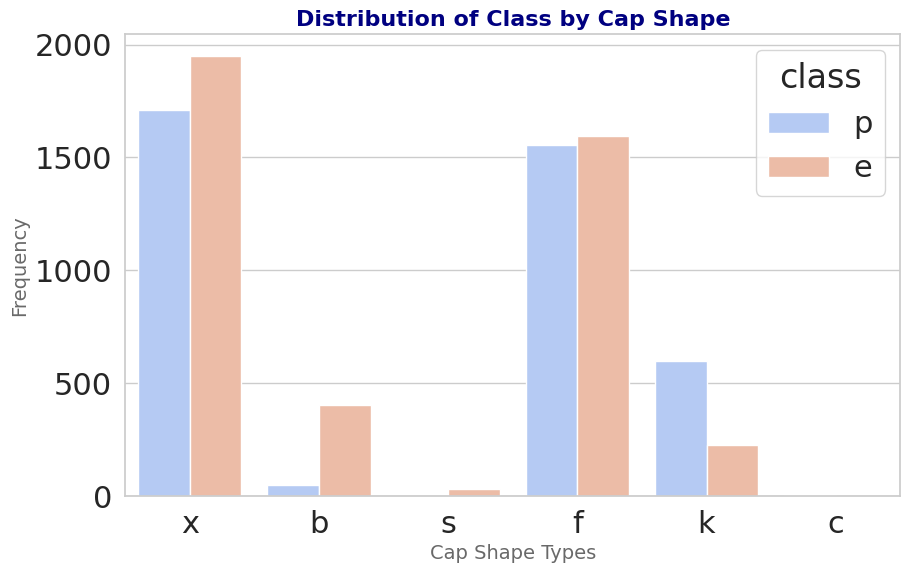

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mushroom_data = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

sns.set_style('whitegrid')
sns.countplot(x='cap-shape', hue='class', data=mushroom_data, palette="coolwarm")

plt.title('Distribution of Class by Cap Shape', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Cap Shape Types', fontsize=14, color='dimgray')
plt.ylabel('Frequency', fontsize=14, color='dimgray')

plt.show()

<ipython-input-140-f4204796630c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cap-color', data=mushroom_data, order=mushroom_data['cap-color'].value_counts().index, palette='coolwarm')


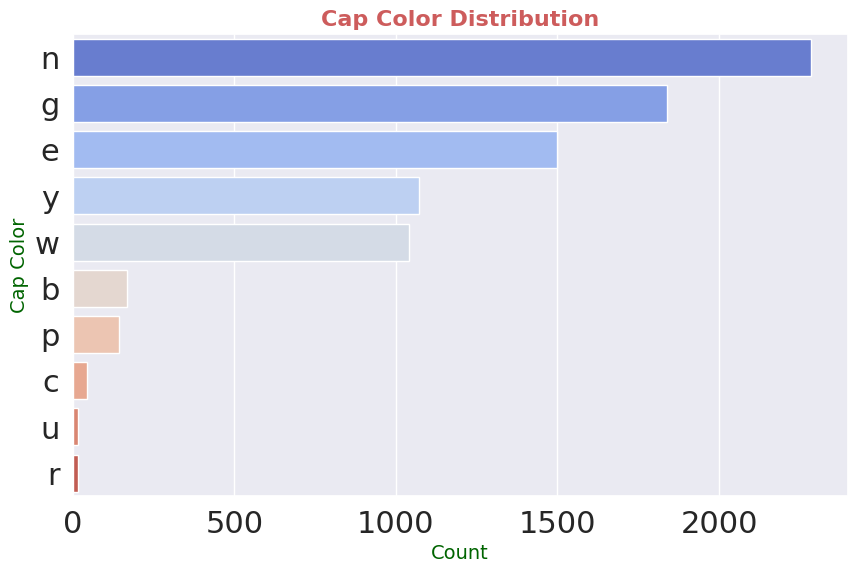

In [140]:
plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.countplot(y='cap-color', data=mushroom_data, order=mushroom_data['cap-color'].value_counts().index, palette='coolwarm')

plt.title('Cap Color Distribution', fontsize=16, fontweight='bold', color='indianred')
plt.xlabel('Count', fontsize=14, color='darkgreen')
plt.ylabel('Cap Color', fontsize=14, color='darkgreen')

plt.show()

<ipython-input-141-484be6b07661>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='bruises_encoded', data=mushroom_data, palette='coolwarm')


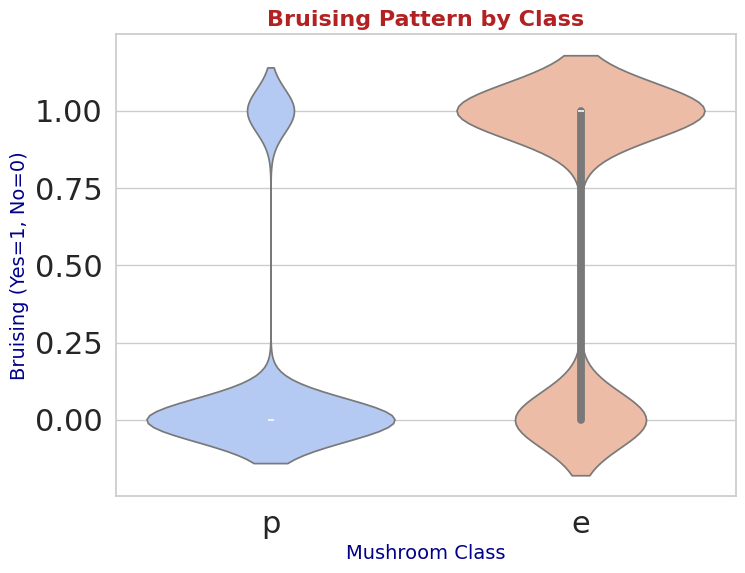

In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mushroom_data['bruises_encoded'] = le.fit_transform(mushroom_data['bruises'])

plt.figure(figsize=(8, 6))

sns.set_style('whitegrid')
sns.violinplot(x='class', y='bruises_encoded', data=mushroom_data, palette='coolwarm')

plt.title('Bruising Pattern by Class', fontsize=16, fontweight='bold', color='firebrick')
plt.xlabel('Mushroom Class', fontsize=14, color='darkblue')
plt.ylabel('Bruising (Yes=1, No=0)', fontsize=14, color='darkblue')

plt.show()

<ipython-input-142-0cb770b6d737>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bruises', data=mushroom_data, palette='viridis')


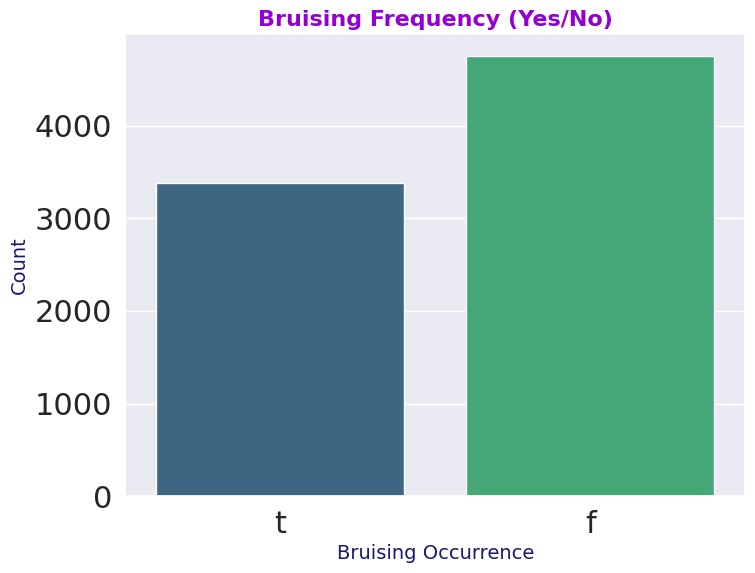

In [142]:
plt.figure(figsize=(8, 6))

sns.set_style('darkgrid')
sns.countplot(x='bruises', data=mushroom_data, palette='viridis')

plt.title('Bruising Frequency (Yes/No)', fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel('Bruising Occurrence', fontsize=14, color='midnightblue')
plt.ylabel('Count', fontsize=14, color='midnightblue')

plt.show()

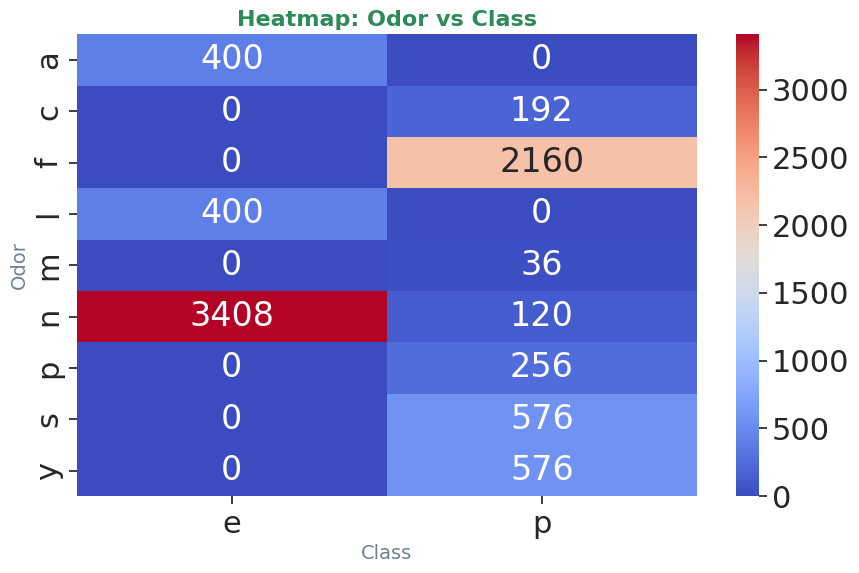

In [143]:
odor_class_pivot = pd.crosstab(mushroom_data['odor'], mushroom_data['class'])
plt.figure(figsize=(10, 6))

sns.set_style('ticks')
sns.heatmap(odor_class_pivot, annot=True, cmap="coolwarm", fmt="d", cbar=True)

plt.title('Heatmap: Odor vs Class', fontsize=16, fontweight='bold', color='seagreen')
plt.xlabel('Class', fontsize=14, color='slategray')
plt.ylabel('Odor', fontsize=14, color='slategray')

plt.show()

<ipython-input-144-3d868ff63f82>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gill-size', data=mushroom_data, palette='crest')


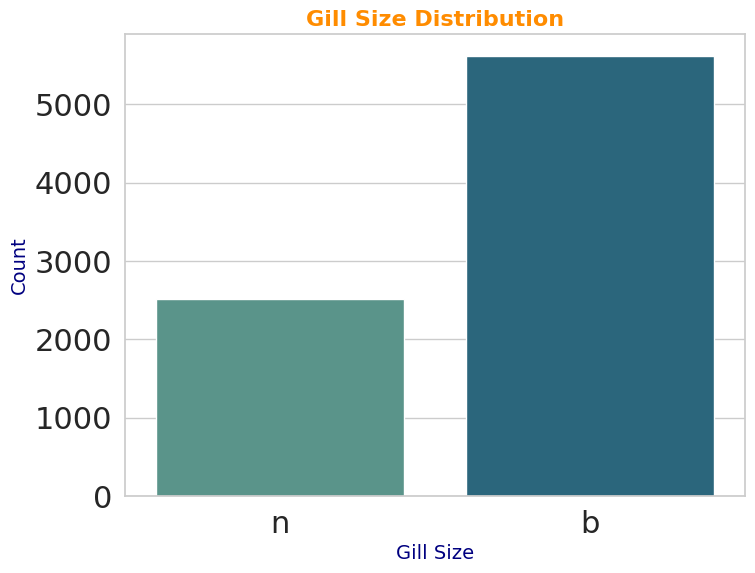

In [144]:
plt.figure(figsize=(8, 6))

sns.set_style('whitegrid')
sns.countplot(x='gill-size', data=mushroom_data, palette='crest')

plt.title('Gill Size Distribution', fontsize=16, fontweight='bold', color='darkorange')
plt.xlabel('Gill Size', fontsize=14, color='navy')
plt.ylabel('Count', fontsize=14, color='navy')

plt.show()

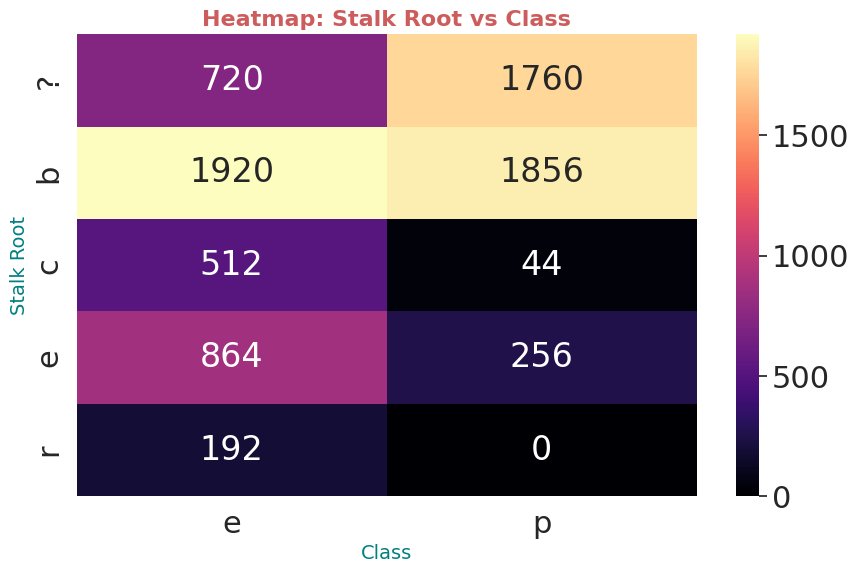

In [146]:
stalk_root_class_pivot = pd.crosstab(mushroom_data['stalk-root'], mushroom_data['class'])
plt.figure(figsize=(10, 6))

sns.set_style('darkgrid')
sns.heatmap(stalk_root_class_pivot, annot=True, cmap="magma", fmt="d", cbar=True)

plt.title('Heatmap: Stalk Root vs Class', fontsize=16, fontweight='bold', color='indianred')
plt.xlabel('Class', fontsize=14, color='teal')
plt.ylabel('Stalk Root', fontsize=14, color='teal')

plt.show()

<ipython-input-147-89c953e7646e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stalk-color-above-ring', data=mushroom_data, palette='viridis')


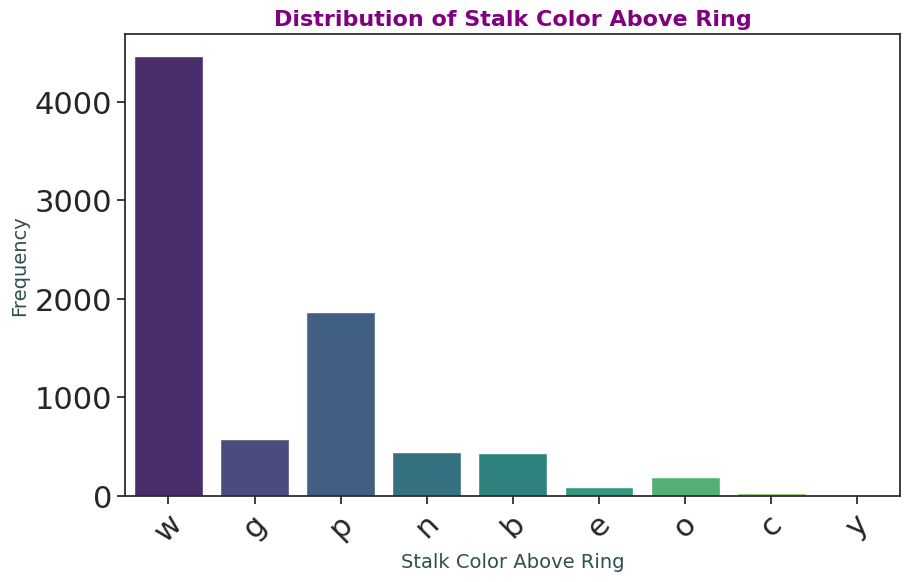

In [147]:
plt.figure(figsize=(10, 6))

sns.set_style('ticks')
sns.countplot(x='stalk-color-above-ring', data=mushroom_data, palette='viridis')

plt.title('Distribution of Stalk Color Above Ring', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Stalk Color Above Ring', fontsize=14, color='darkslategray')
plt.ylabel('Frequency', fontsize=14, color='darkslategray')

plt.xticks(rotation=45)

plt.show()

<ipython-input-148-4668da54f02f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='spore-print-color', data=mushroom_data, order=mushroom_data['spore-print-color'].value_counts().index, palette='coolwarm')


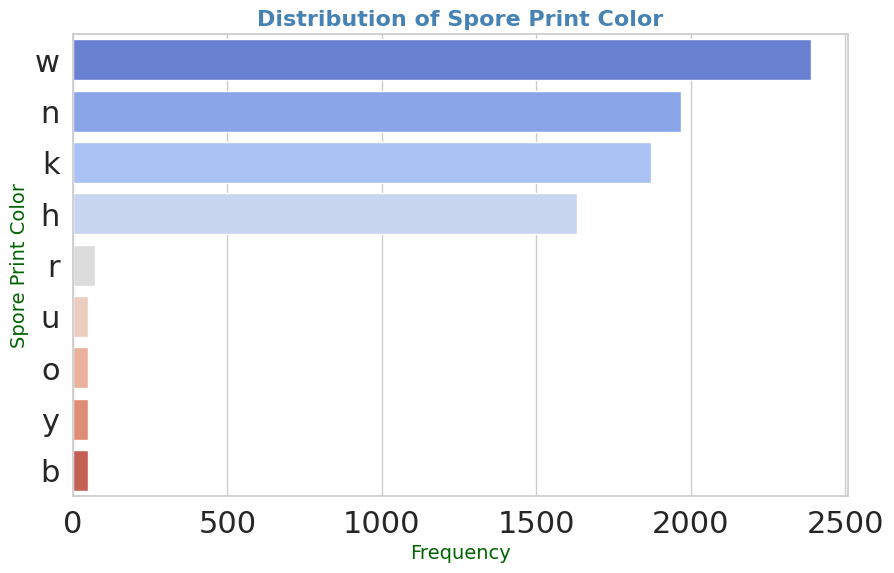

In [148]:
plt.figure(figsize=(10, 6))

sns.set_style('whitegrid')
sns.countplot(y='spore-print-color', data=mushroom_data, order=mushroom_data['spore-print-color'].value_counts().index, palette='coolwarm')

plt.title('Distribution of Spore Print Color', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Frequency', fontsize=14, color='darkgreen')
plt.ylabel('Spore Print Color', fontsize=14, color='darkgreen')

plt.show()

<ipython-input-149-6fe989146c98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='population', data=mushroom_data, palette='inferno')


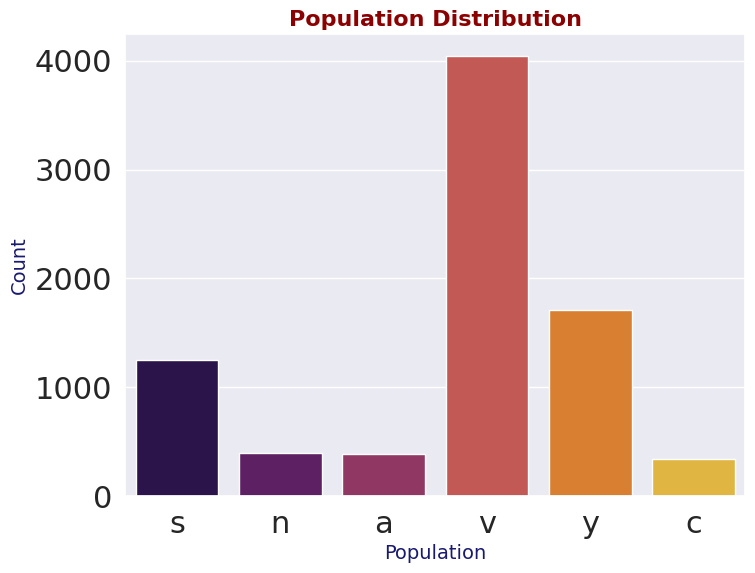

In [149]:
plt.figure(figsize=(8, 6))

sns.set_style('darkgrid')
sns.countplot(x='population', data=mushroom_data, palette='inferno')

plt.title('Population Distribution', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Population', fontsize=14, color='midnightblue')
plt.ylabel('Count', fontsize=14, color='midnightblue')

plt.show()

<ipython-input-151-ad6b73d096e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='habitat', data=mushroom_data, palette='Pastel1')


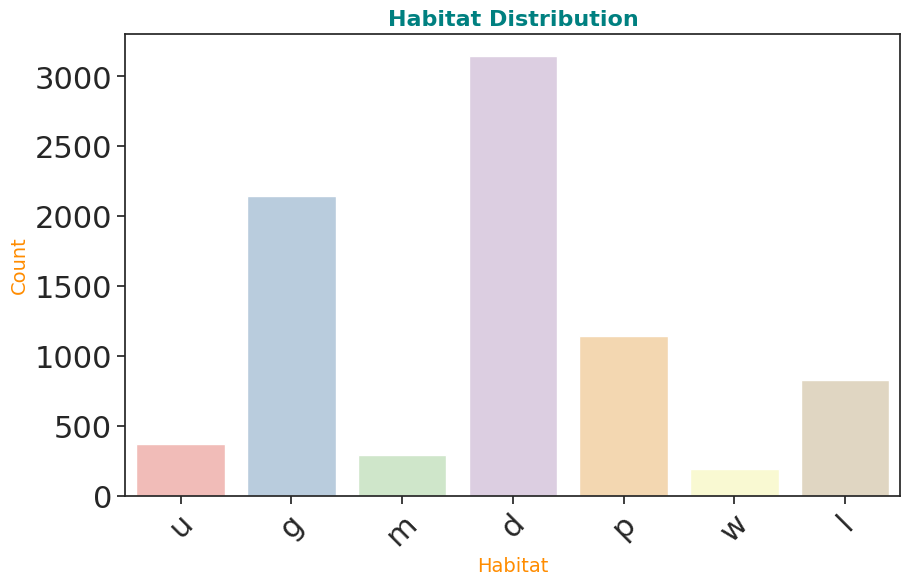

In [151]:
plt.figure(figsize=(10, 6))

sns.set_style('ticks')
sns.countplot(x='habitat', data=mushroom_data, palette='Pastel1')

plt.title('Habitat Distribution', fontsize=16, fontweight='bold', color='teal')
plt.xlabel('Habitat', fontsize=14, color='darkorange')
plt.ylabel('Count', fontsize=14, color='darkorange')

plt.xticks(rotation=45)

plt.show()

<ipython-input-132-0c21408f8d2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gill-color', data=mushroom_data, palette='cubehelix')


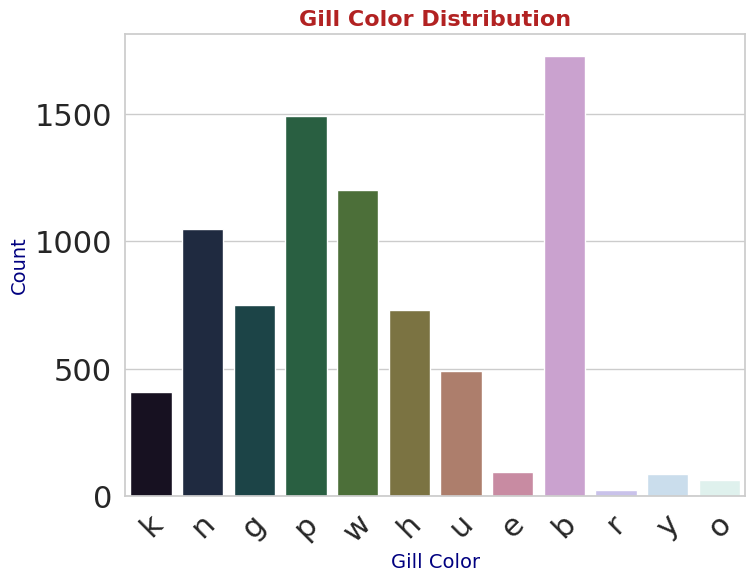

In [132]:
plt.figure(figsize=(8, 6))

# Farklı renk paleti ve stil
sns.set_style('whitegrid')
sns.countplot(x='gill-color', data=mushroom_data, palette='cubehelix')

# Başlık ve etiketler
plt.title('Gill Color Distribution', fontsize=16, fontweight='bold', color='firebrick')
plt.xlabel('Gill Color', fontsize=14, color='navy')
plt.ylabel('Count', fontsize=14, color='navy')

# X eksenindeki etiketleri döndürme
plt.xticks(rotation=45)

plt.show()

<ipython-input-133-7eae05ffca25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ring-number', data=mushroom_data, palette='coolwarm')


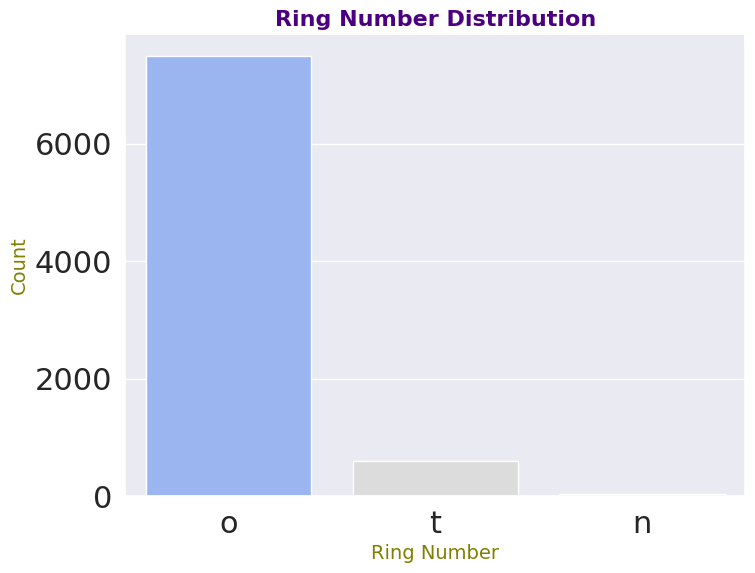

In [133]:
plt.figure(figsize=(8, 6))

# Farklı renk paleti ve stil
sns.set_style('darkgrid')
sns.countplot(x='ring-number', data=mushroom_data, palette='coolwarm')

# Başlık ve etiketler
plt.title('Ring Number Distribution', fontsize=16, fontweight='bold', color='indigo')
plt.xlabel('Ring Number', fontsize=14, color='olive')
plt.ylabel('Count', fontsize=14, color='olive')

plt.show()

<ipython-input-134-ddcc0040e43d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ring-type', data=mushroom_data, palette='muted')


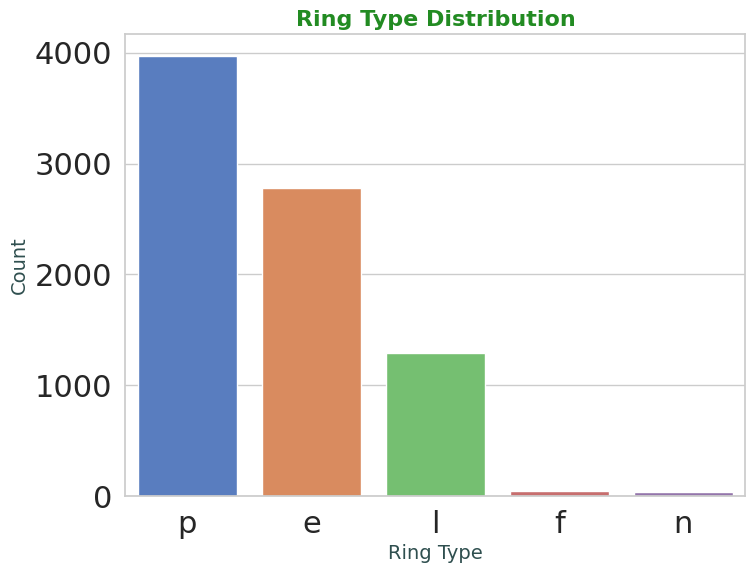

In [134]:
plt.figure(figsize=(8, 6))

# Farklı renk paleti ve stil
sns.set_style('whitegrid')
sns.countplot(x='ring-type', data=mushroom_data, palette='muted')

# Başlık ve etiketler
plt.title('Ring Type Distribution', fontsize=16, fontweight='bold', color='forestgreen')
plt.xlabel('Ring Type', fontsize=14, color='darkslategray')
plt.ylabel('Count', fontsize=14, color='darkslategray')

plt.show()

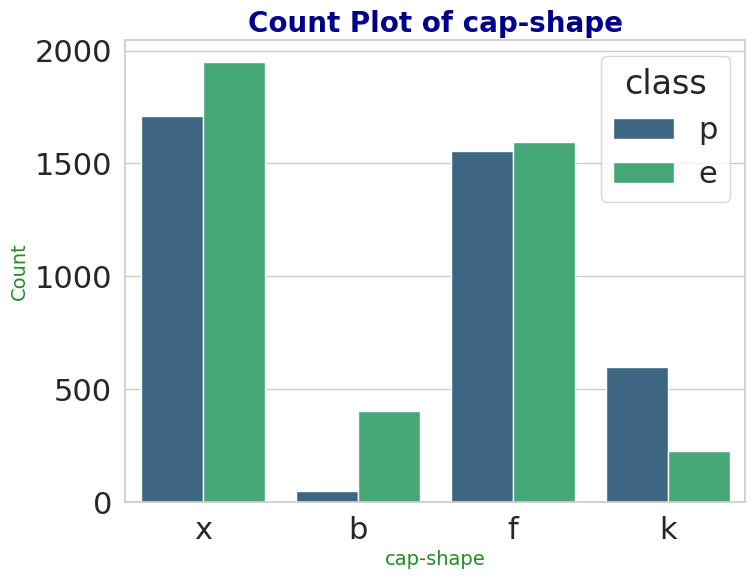

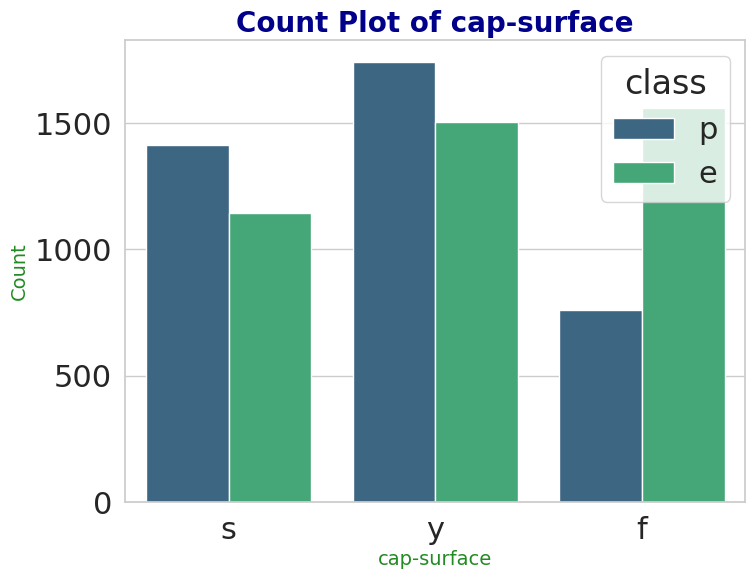

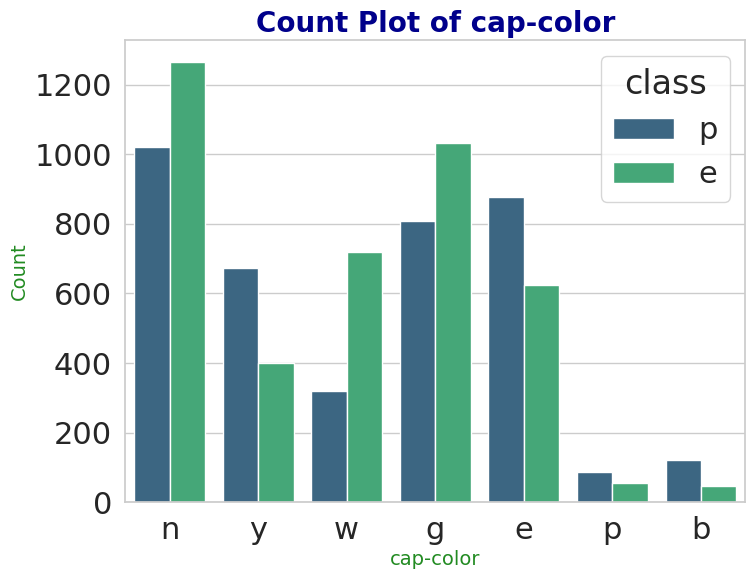

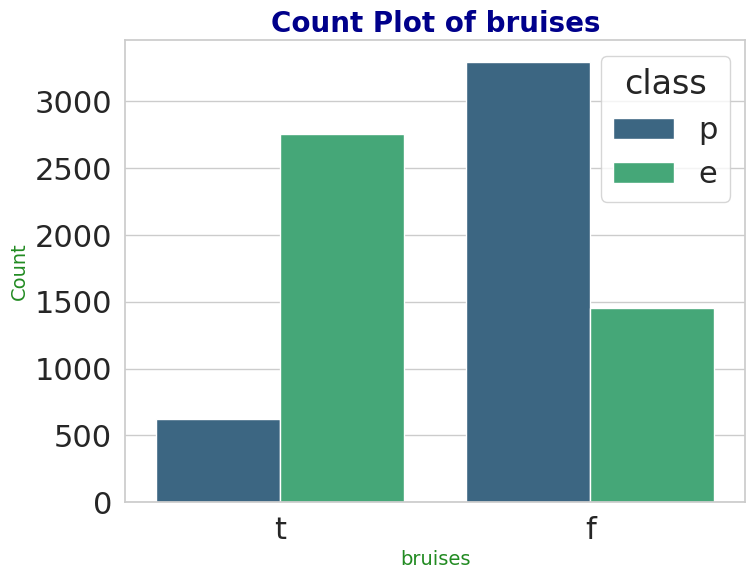

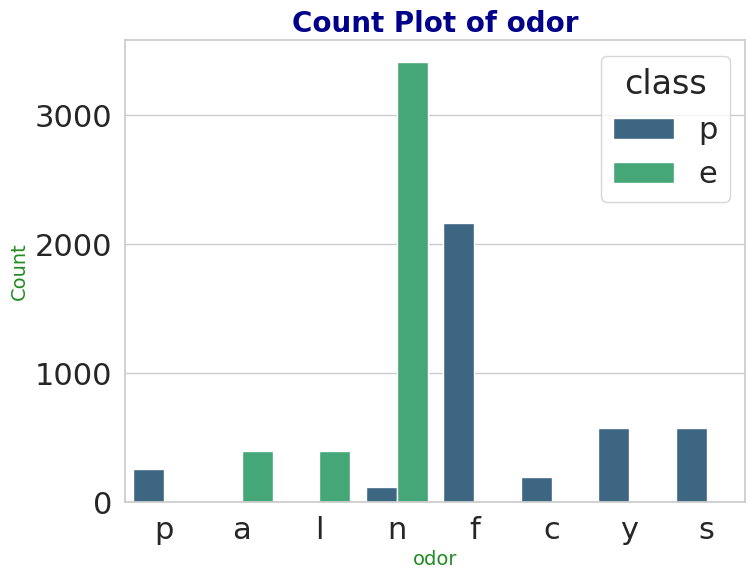

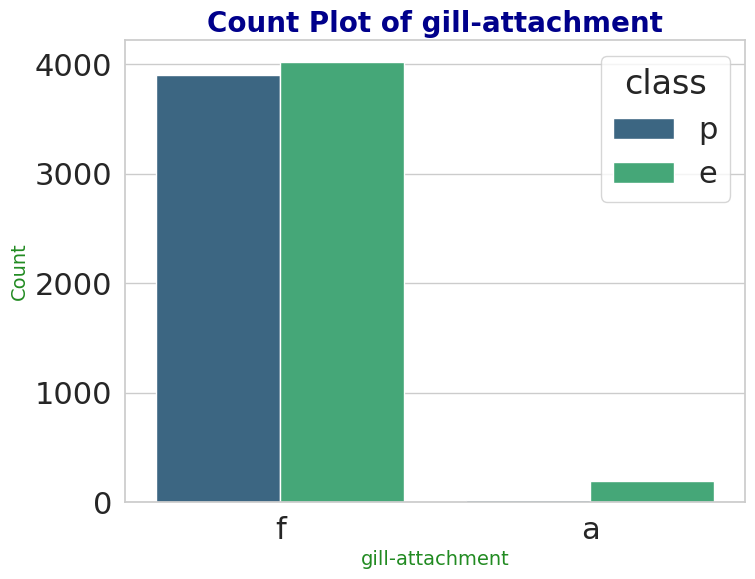

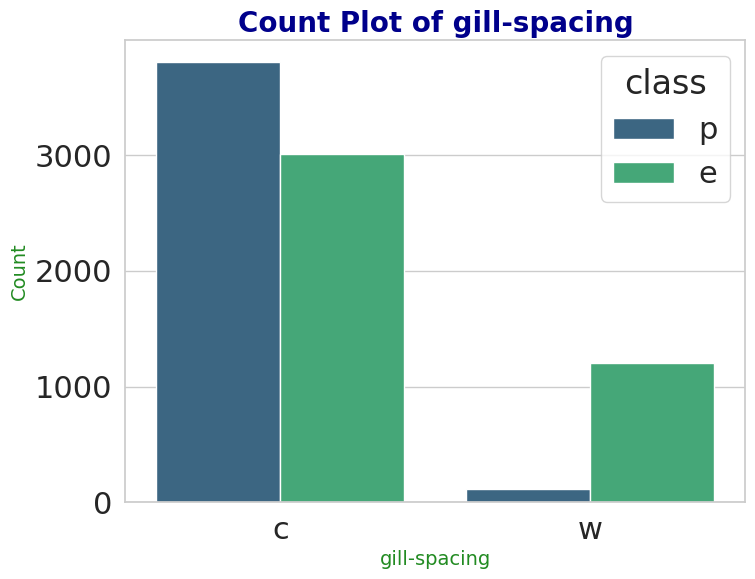

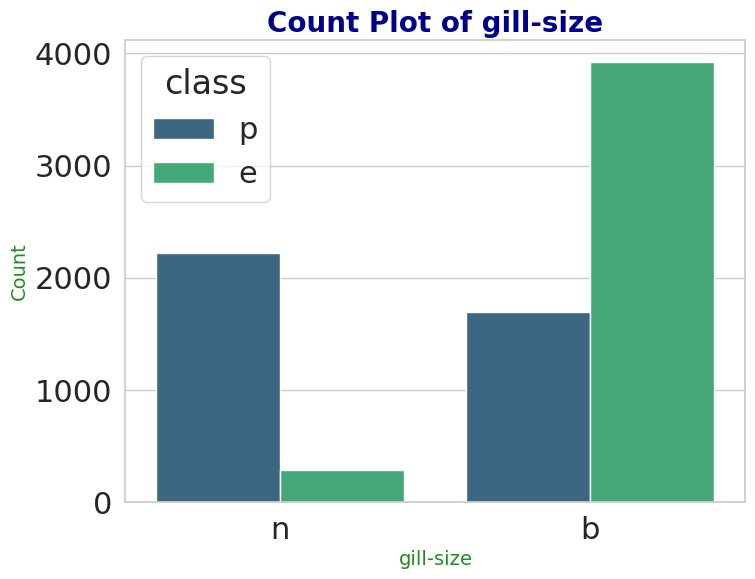

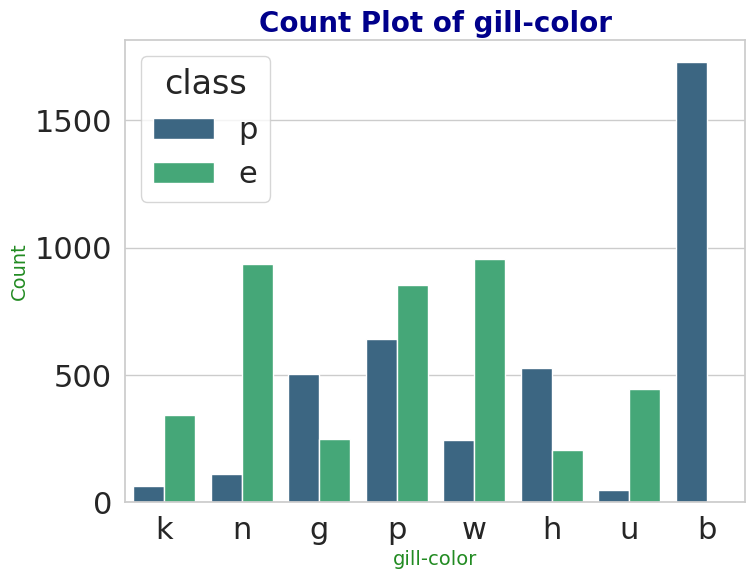

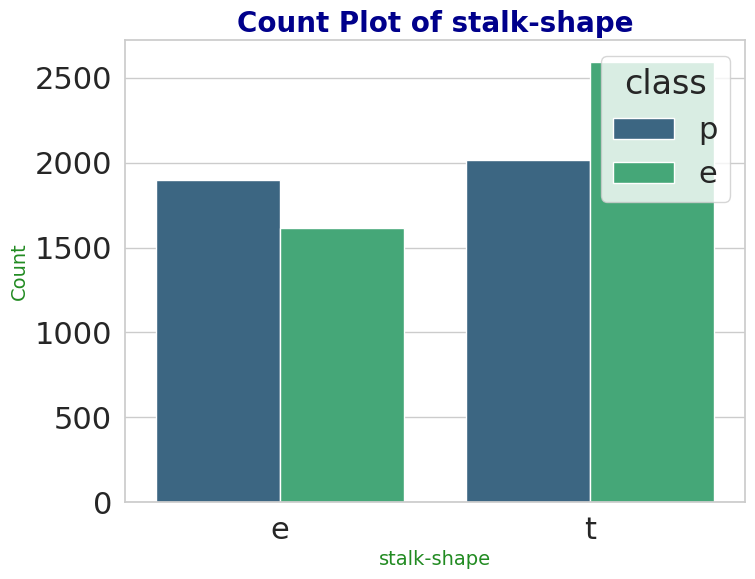

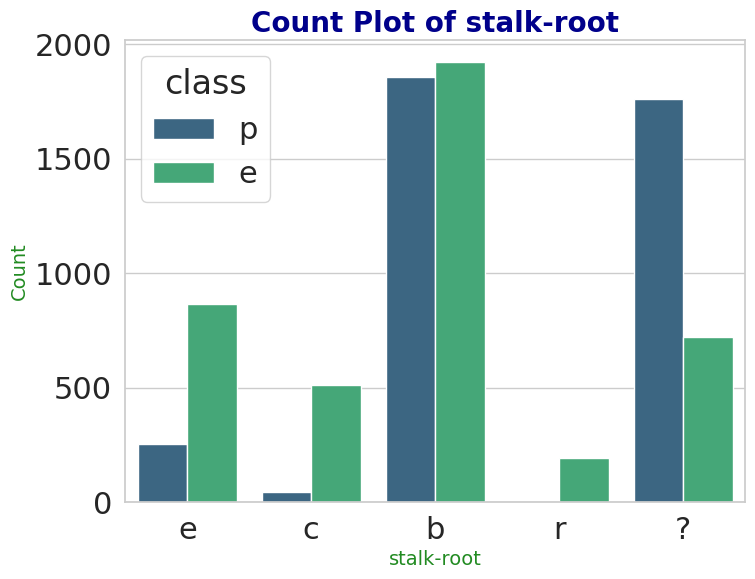

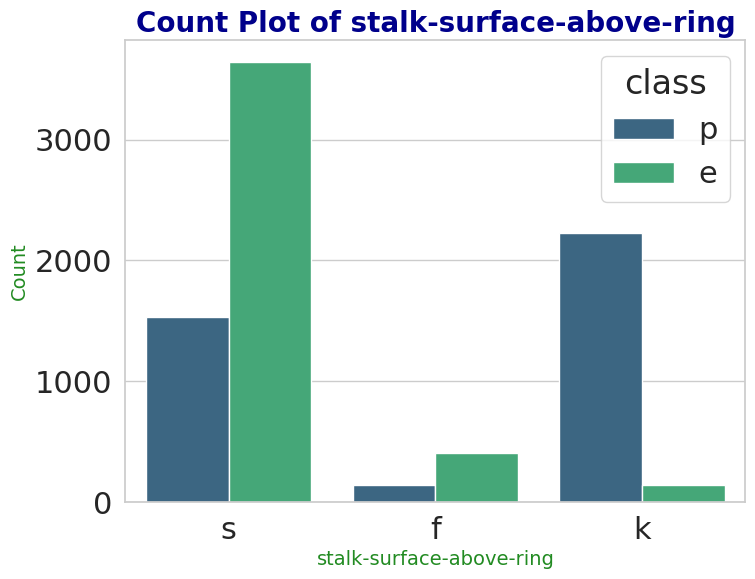

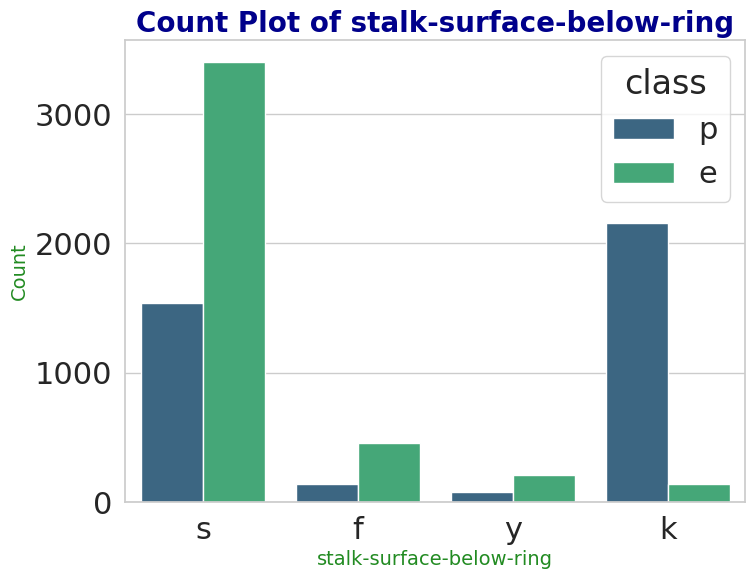

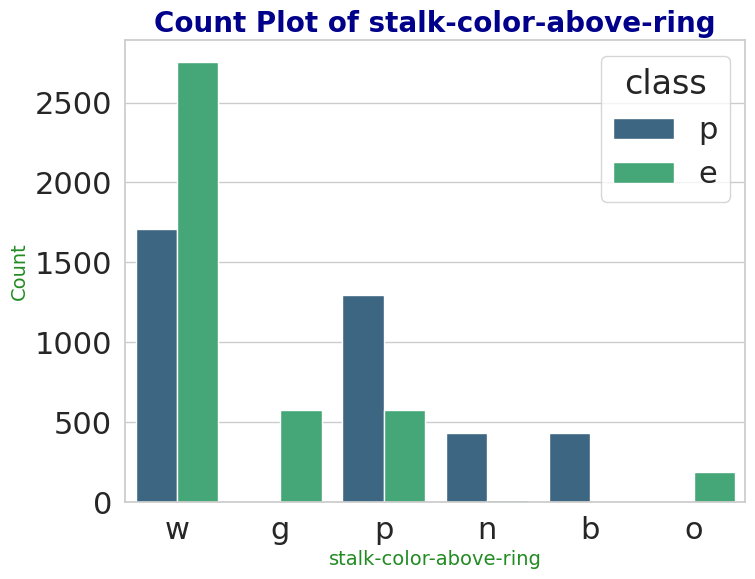

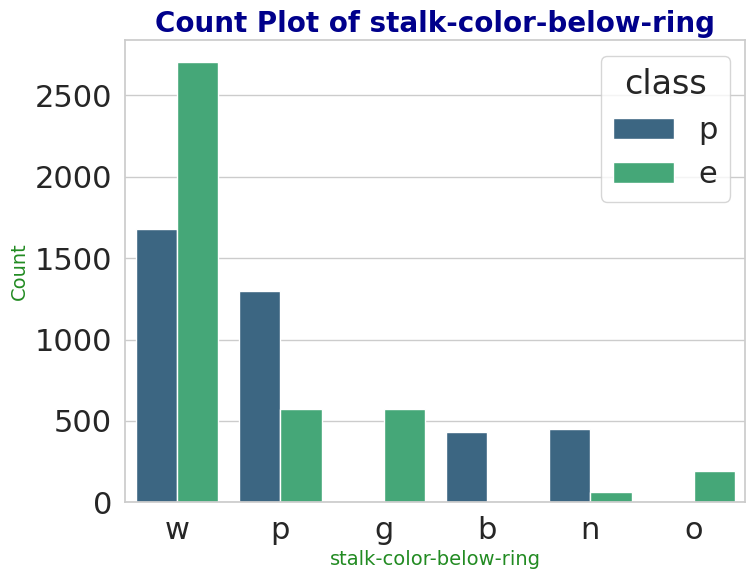

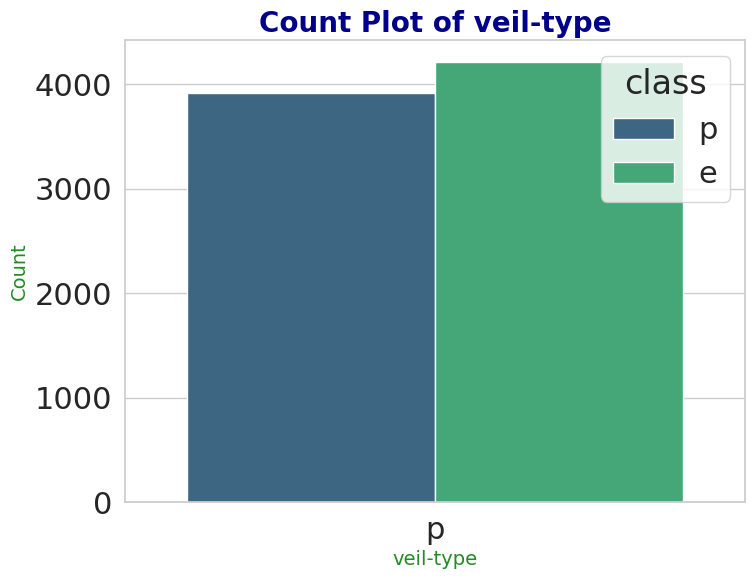

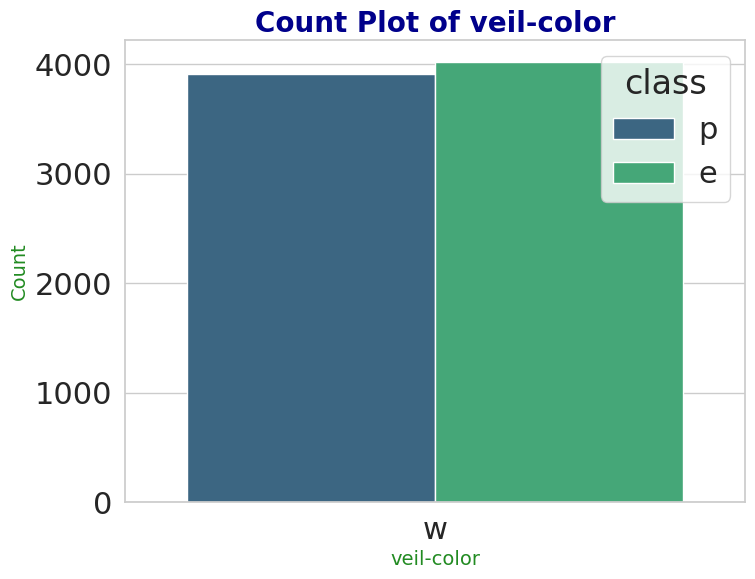

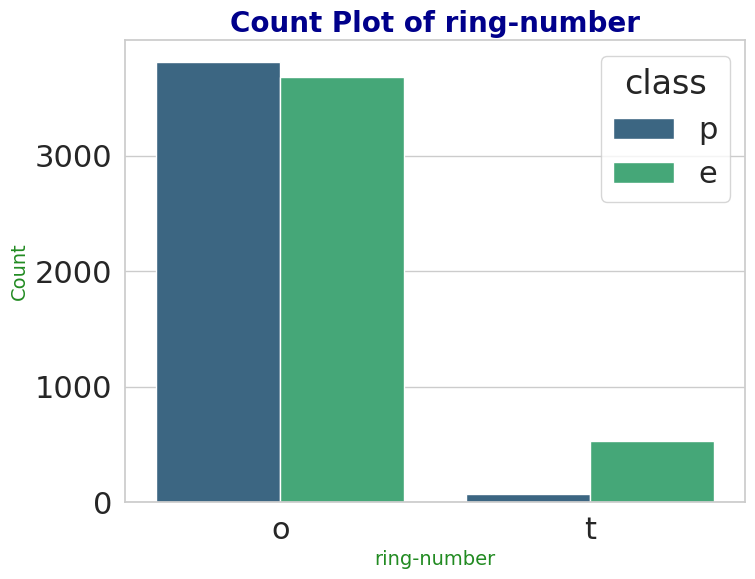

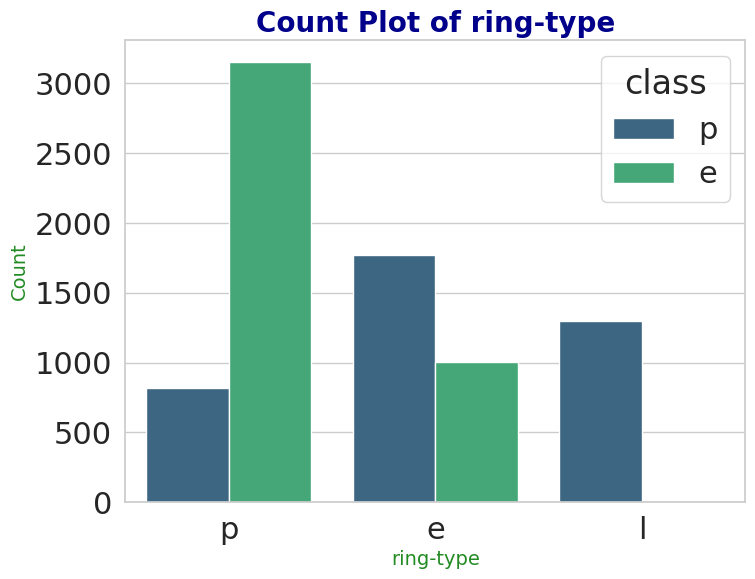

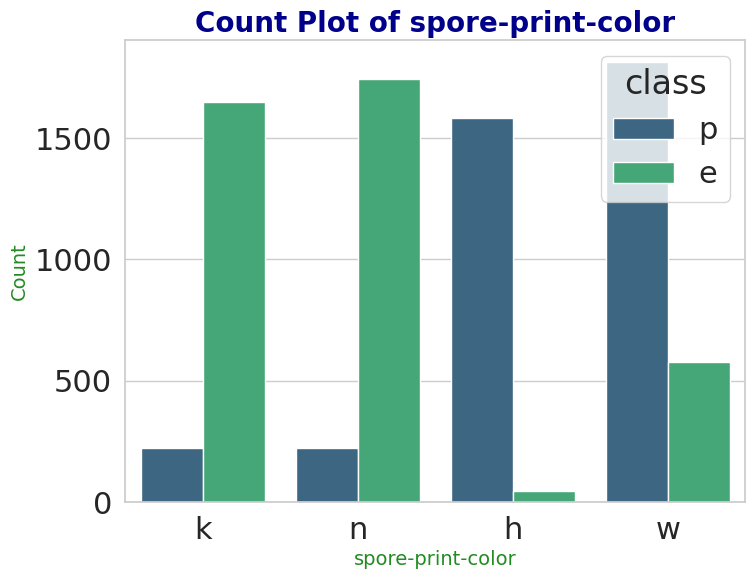

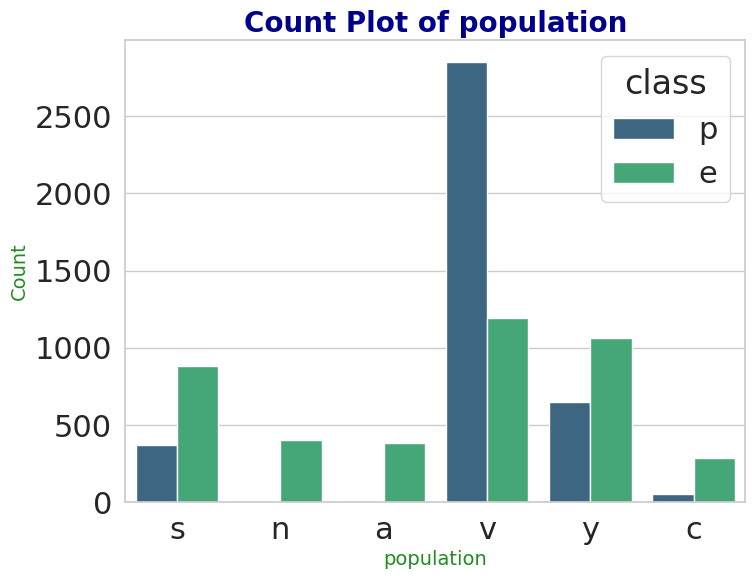

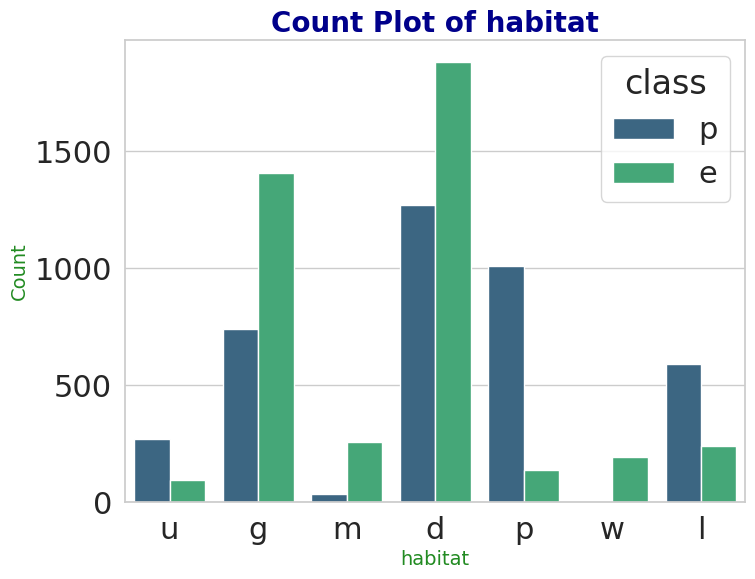

In [135]:
for i, col in enumerate(categorical_features):
    plt.figure(figsize=(8, 6))

    # Veriyi filtreleme
    fil_data = data[col].value_counts()
    fil_cat = fil_data[fil_data>=100].index
    fil_df = data[data[col].isin(fil_cat)]

    # Countplot oluşturma
    sns.countplot(x=col, hue=target, data=fil_df, palette='viridis')

    # Başlık ve etiketler
    plt.title(f"Count Plot of {col}", size=20, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=14, color='forestgreen')
    plt.ylabel('Count', fontsize=14, color='forestgreen')

    # Grafik gösterimi
    plt.show()

In [54]:
target = data['class']
inputs = data.drop(['class'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=24, stratify=target)

In [56]:
y_train.value_counts()

,count
class,
e,2945
p,2741


In [57]:
y_test.value_counts()

,count
class,
e,1263
p,1175


In [58]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()
x_train_transf = enc_i.fit_transform(X_train)
x_test_transf = enc_i.fit_transform(X_test)

y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.fit_transform(y_test)

In [59]:

x_train_transf

array([[5., 2., 8., ..., 2., 3., 0.],
       [0., 2., 3., ..., 7., 2., 1.],
       [5., 3., 9., ..., 1., 5., 4.],
       ...,
       [5., 3., 9., ..., 1., 4., 0.],
       [2., 3., 8., ..., 2., 3., 1.],
       [2., 0., 9., ..., 3., 4., 0.]])

In [60]:
y_train_transf

array([1, 0, 1, ..., 1, 1, 0])

In [61]:
x_test_transf.dtype

dtype('float64')

In [62]:
scaling = MinMaxScaler(feature_range= (-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

In [63]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [64]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [65]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)


In [66]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [67]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [68]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [72]:
# ... (Rest of the code remains the same) ...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap  # ListedColormap'ı import ettik

def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))

    # Define the colormap using valid color values
    cmap = ListedColormap(['red', 'green'])  # Use a list of color names

    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    # Use the defined colormap for contourf
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = cmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Use the defined colormap for scatter plot
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = cmap(i), label = j)  # Index the colormap directly

    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

# ... (Rest of the code remains the same) ...

In [73]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [74]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [76]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 434 2301]]

Average Accuracy:	0.9057

Standard Deviation:	0.0098


In [77]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [79]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   5 2730]]

Average Accuracy:	0.9270

Standard Deviation:	0.0112


In [80]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9315

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1212   45]
 [ 122 1059]]



<ipython-input-72-bb4c7fe3ab87>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


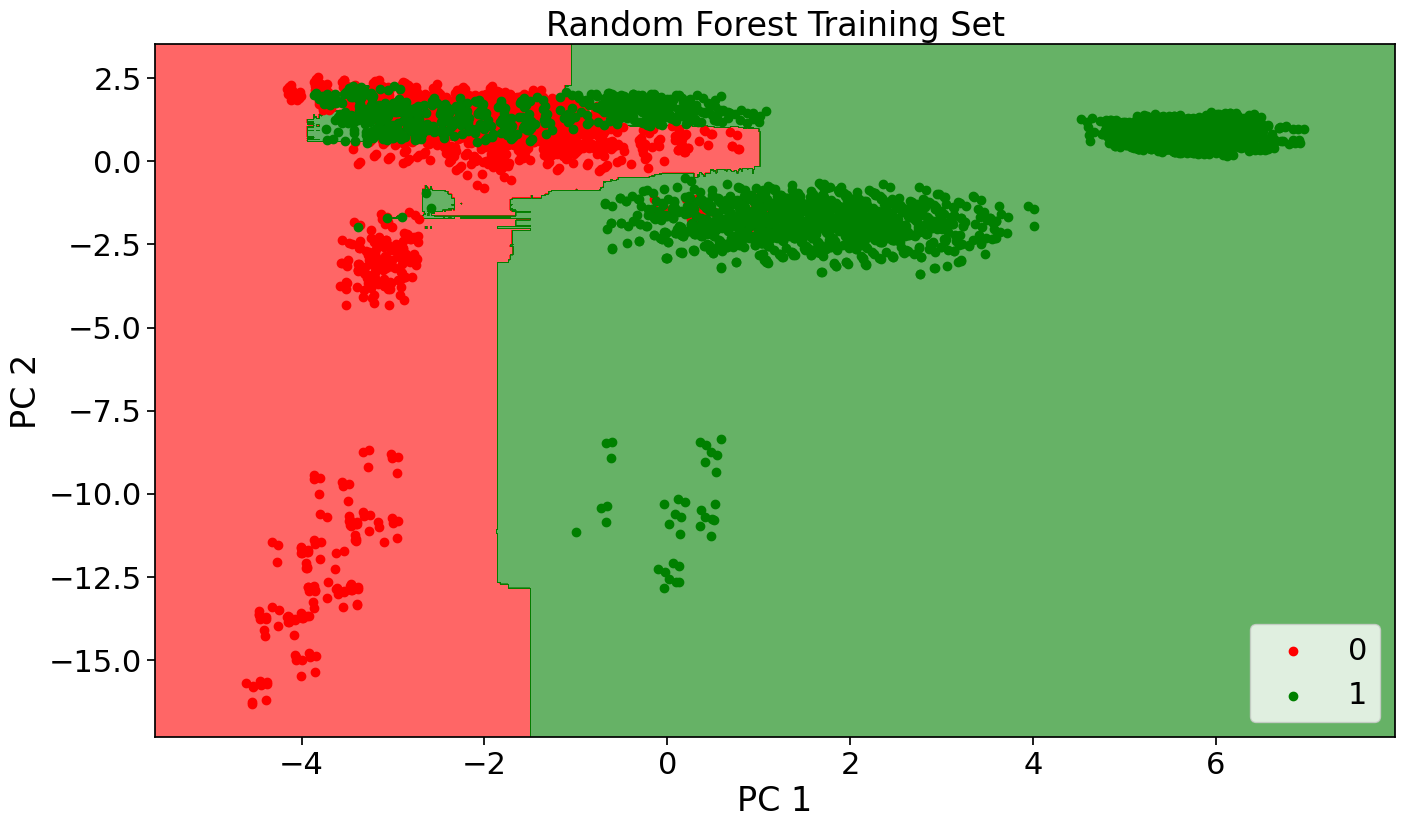

In [81]:
visualization_train('Random Forest')

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

# ... (Your other imports and code) ...


def visualization_test(model):
    sns.set_context(context='notebook', font_scale=2)
    plt.figure(figsize=(16, 9))

    # Define the colormap using valid color values
    cmap = ListedColormap(['red', 'green'])  # Use a list of color names

    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    # Use the defined colormap for contourf
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.6, cmap=cmap)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Use the defined colormap for scatter plot
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=cmap(i), label=j)  # Index the colormap directly

    plt.title("%s Test Set" % (model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


<ipython-input-82-0aff4da840ac>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


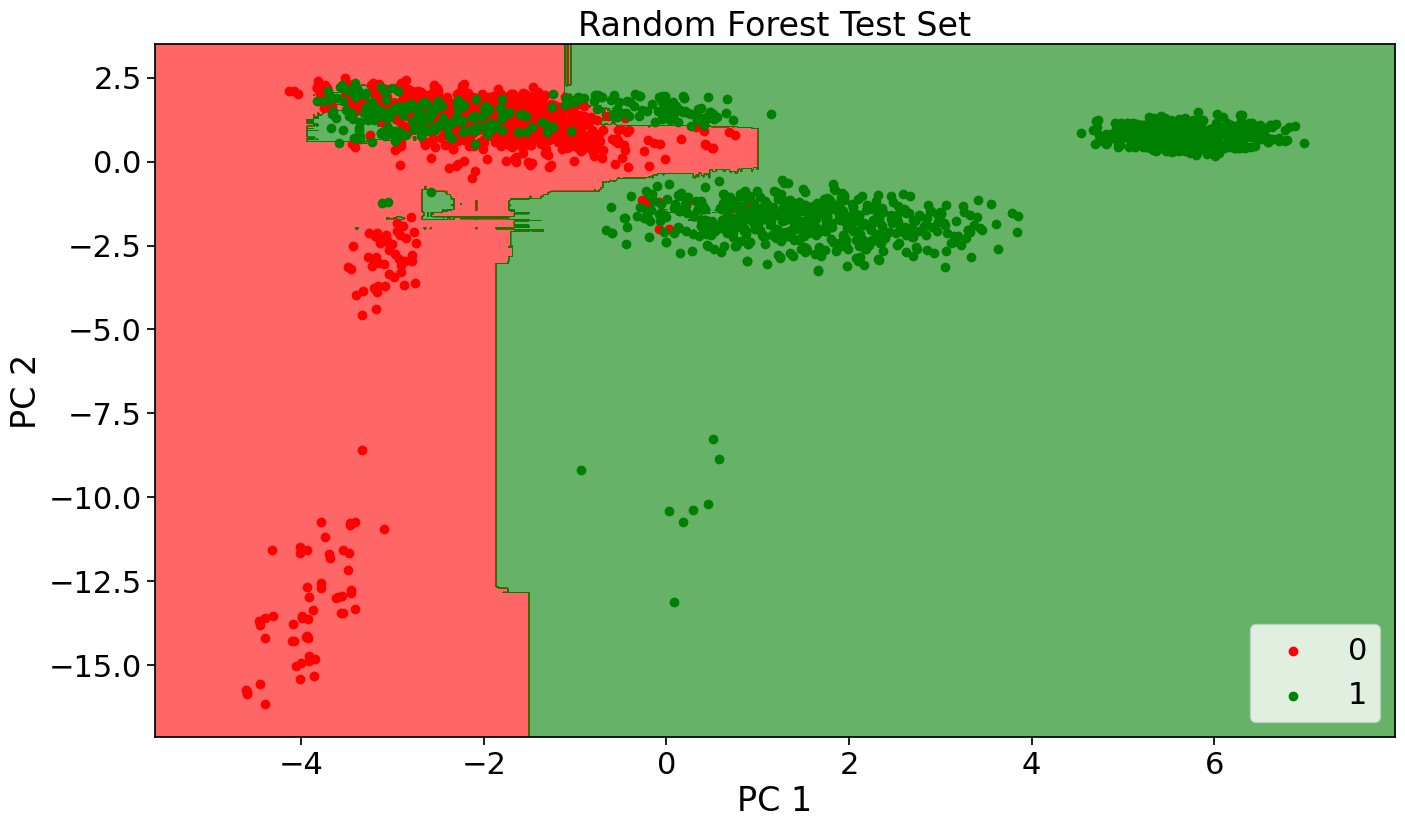

In [83]:
visualization_test('Random Forest')

# **DECISION TREE CLASSIFICATION MODEL**

In [84]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [85]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8915

Standard Deviation:	0.0098


In [86]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)


Test results:

Accuracy Score: 0.9011

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1257
           1       0.90      0.89      0.90      1181

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1145  112]
 [ 129 1052]]



<ipython-input-72-bb4c7fe3ab87>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


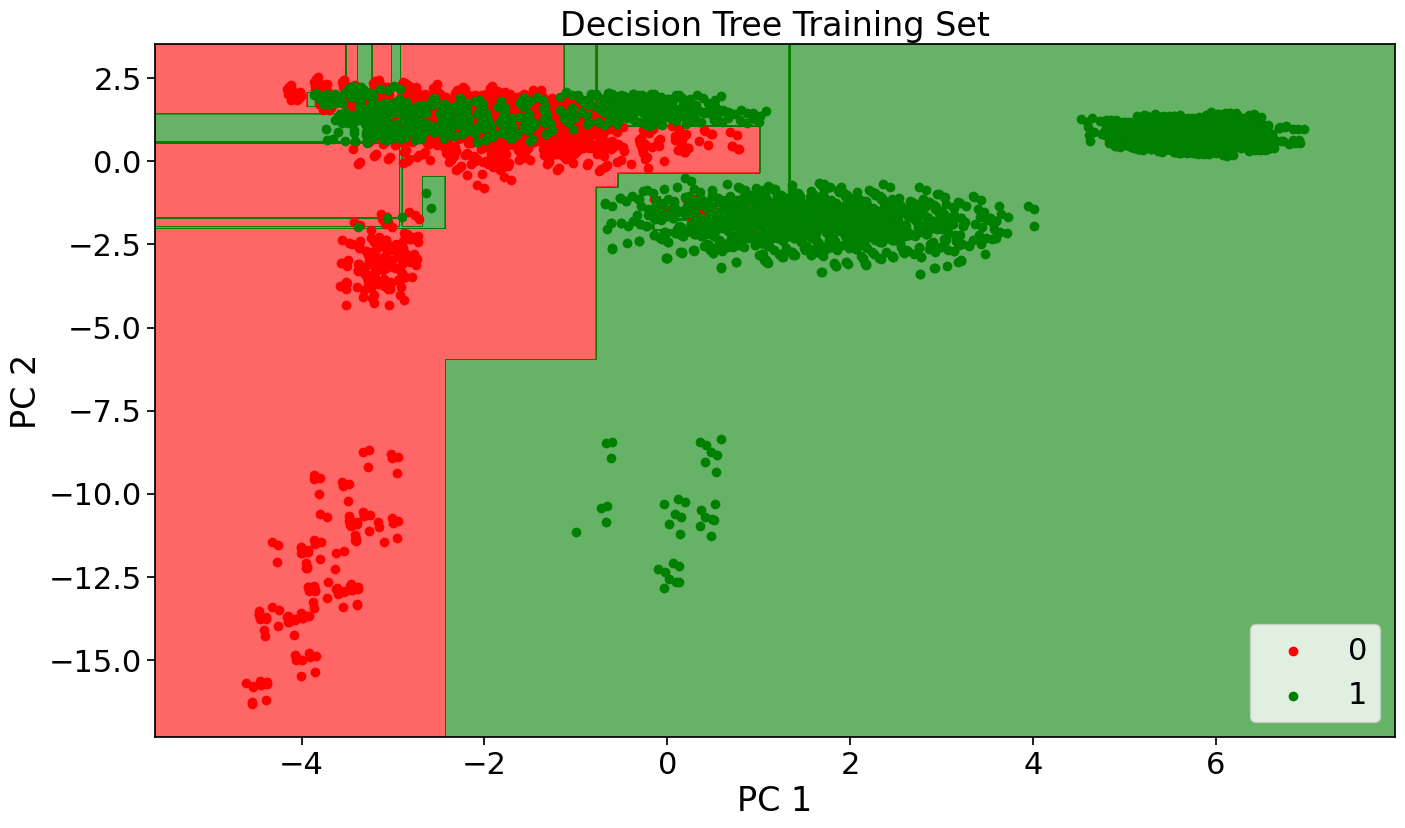

In [87]:

visualization_train('Decision Tree')

SVC CLASSIFICATION MODEL

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(random_state=42)

In [89]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9140

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2951
           1       0.97      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.92      0.91      0.91      5686
weighted avg       0.92      0.91      0.91      5686


Confusion Matrix:
[[2886   65]
 [ 424 2311]]

Average Accuracy:	0.9136

Standard Deviation:	0.0090


In [90]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9085

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1257
           1       0.97      0.83      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1231   26]
 [ 197  984]]



<ipython-input-72-bb4c7fe3ab87>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


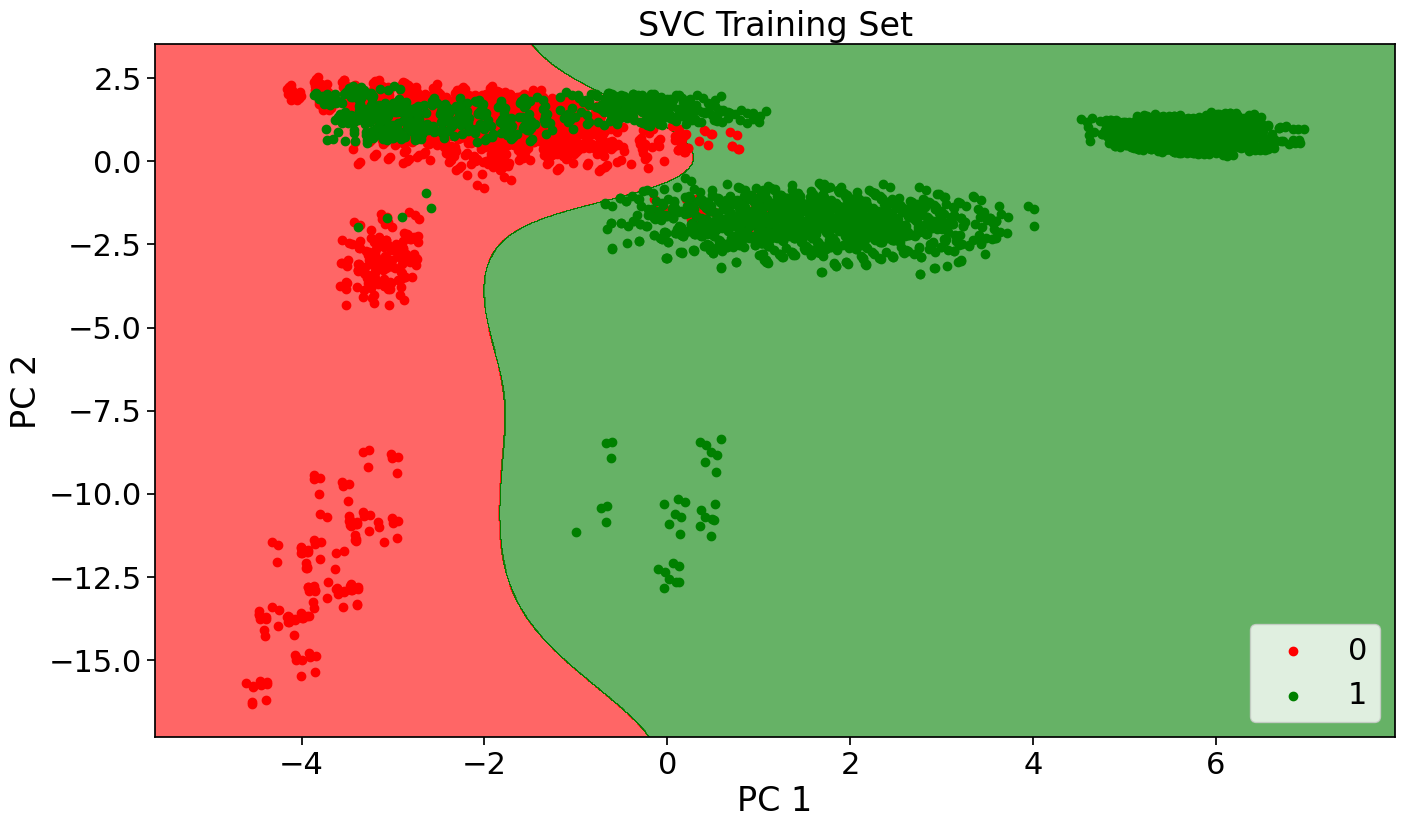

In [91]:
visualization_train('SVC')

<ipython-input-82-0aff4da840ac>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


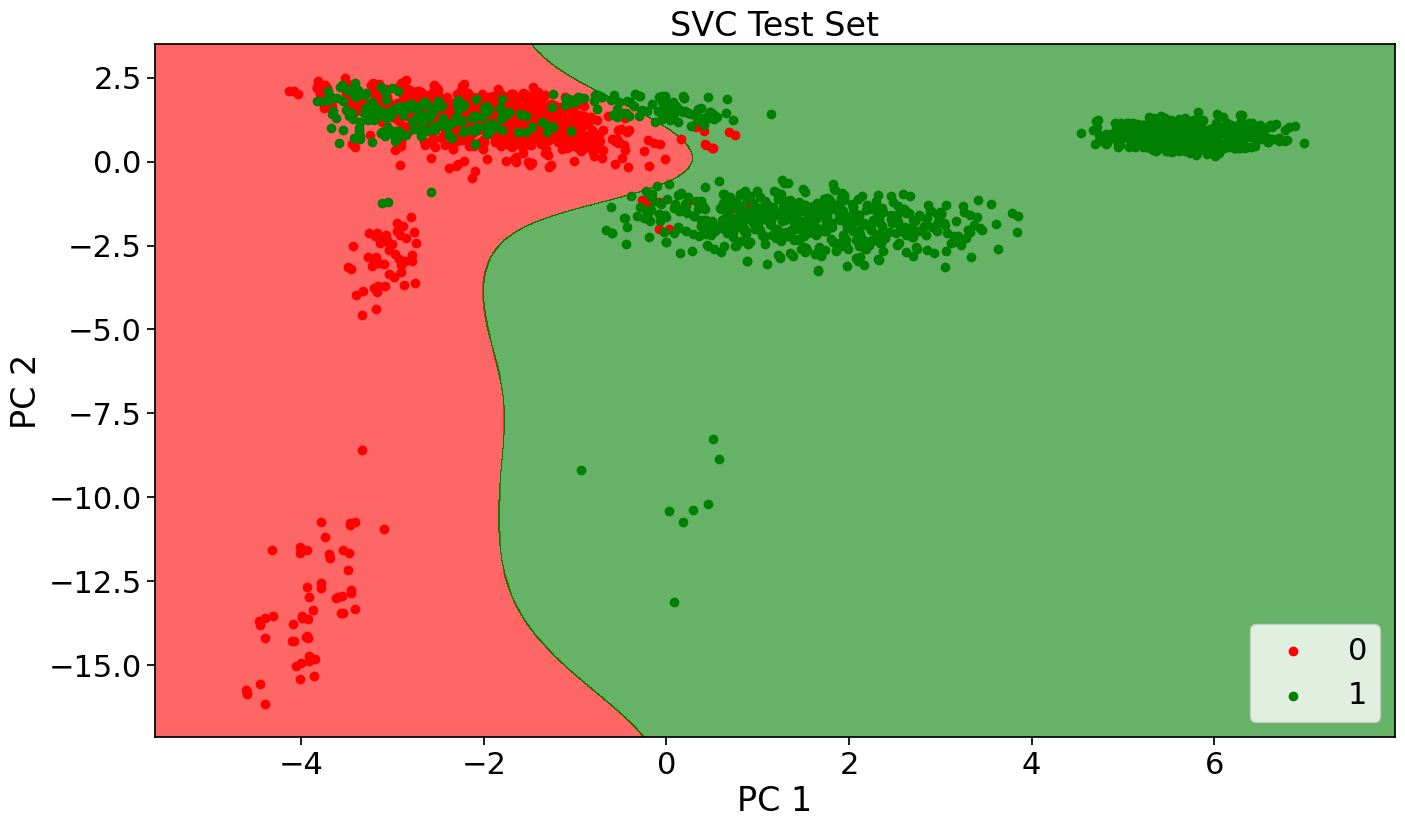

In [92]:
visualization_test('SVC')

**KNN**

In [93]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:

print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.96      0.92      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2860   91]
 [ 232 2503]]

Average Accuracy:	0.9312

Standard Deviation:	0.0096


In [95]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9307

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1211   46]
 [ 123 1058]]



<ipython-input-72-bb4c7fe3ab87>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


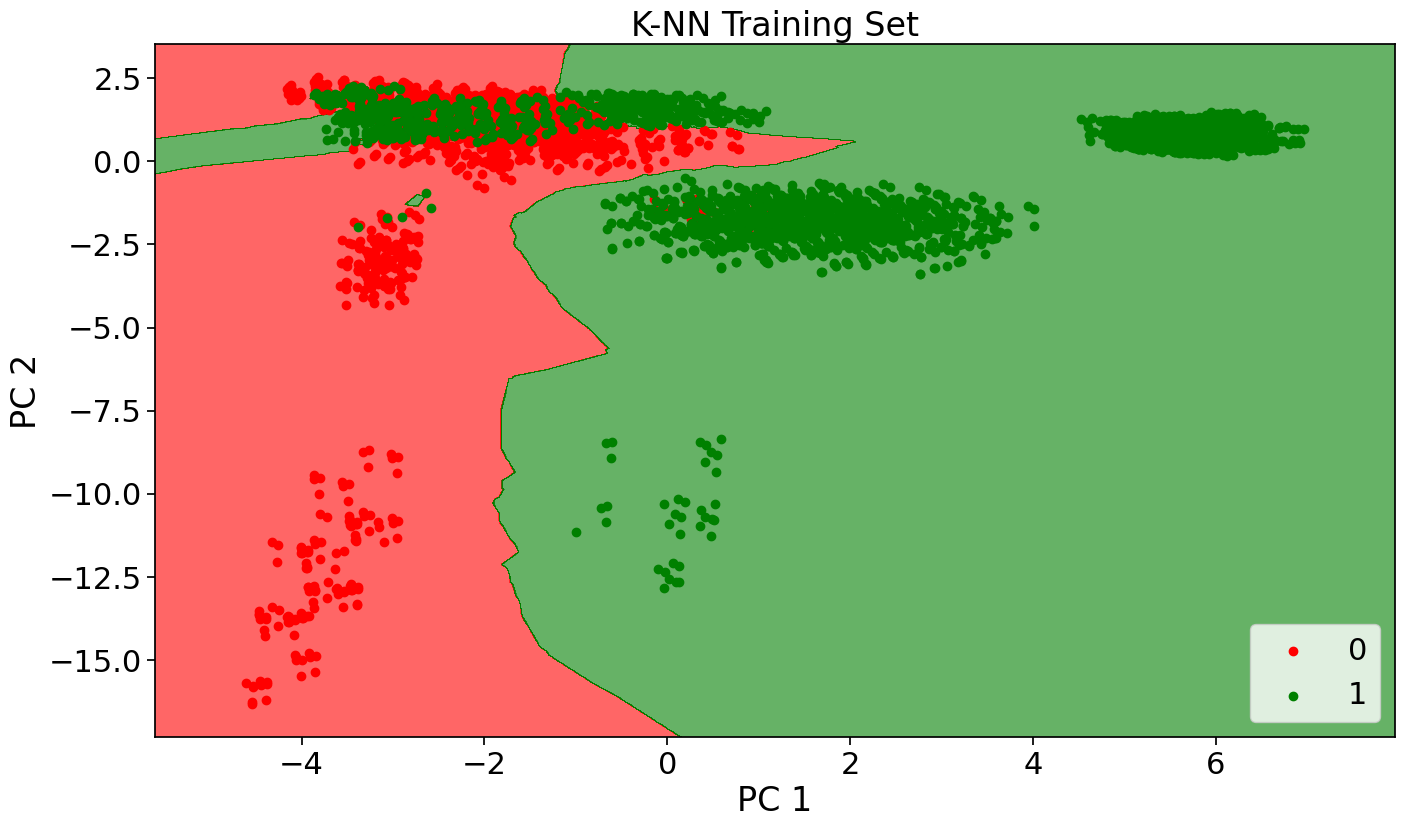

In [96]:
visualization_train('K-NN')

<ipython-input-82-0aff4da840ac>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


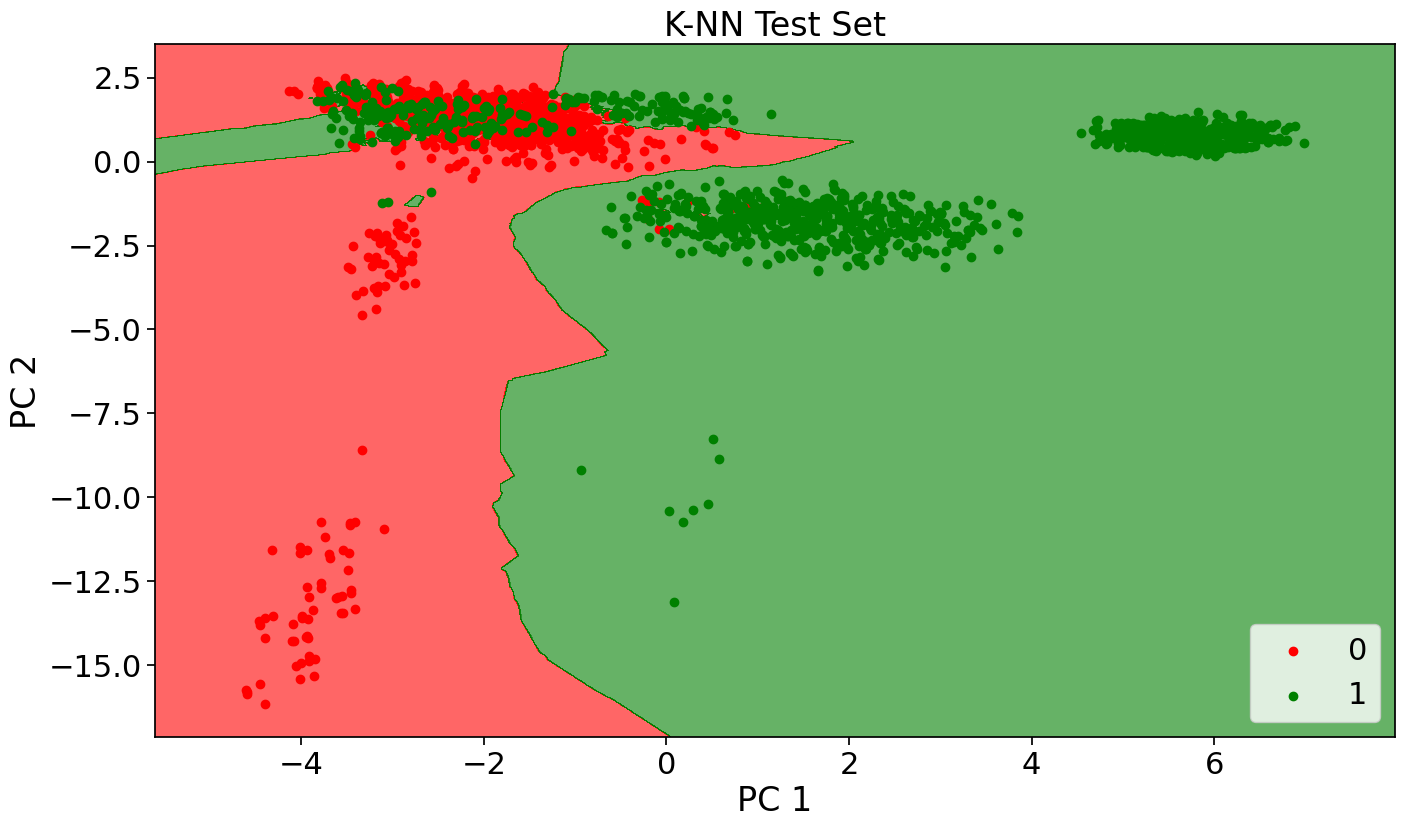

In [97]:
visualization_test('K-NN')

# Naive Bayes Classification Model

In [98]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [99]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8980

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2845  106]
 [ 474 2261]]

Average Accuracy:	0.8982

Standard Deviation:	0.0114


In [100]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1215   42]
 [ 210  971]]



<ipython-input-72-bb4c7fe3ab87>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


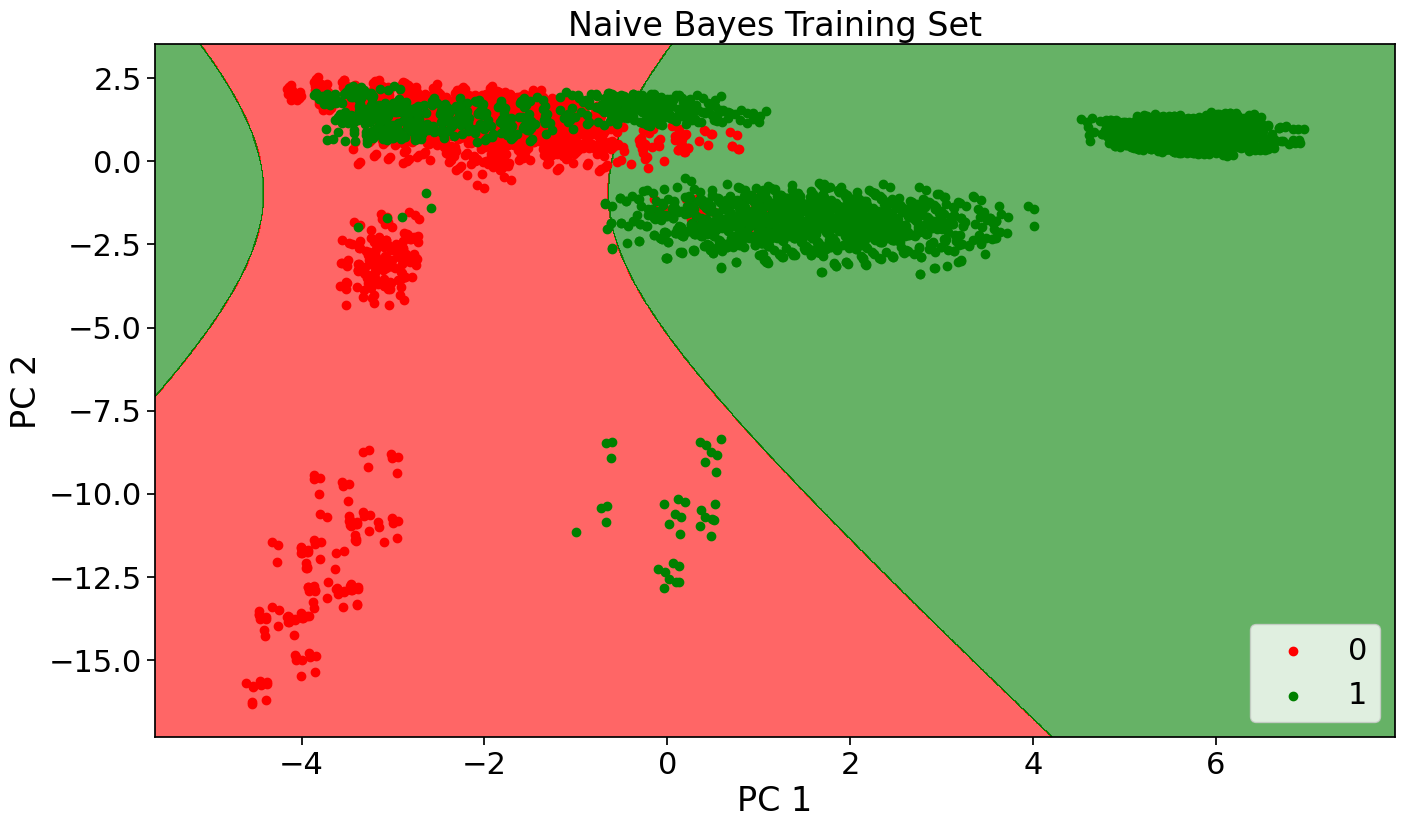

In [101]:
visualization_train('Naive Bayes')

<ipython-input-82-0aff4da840ac>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


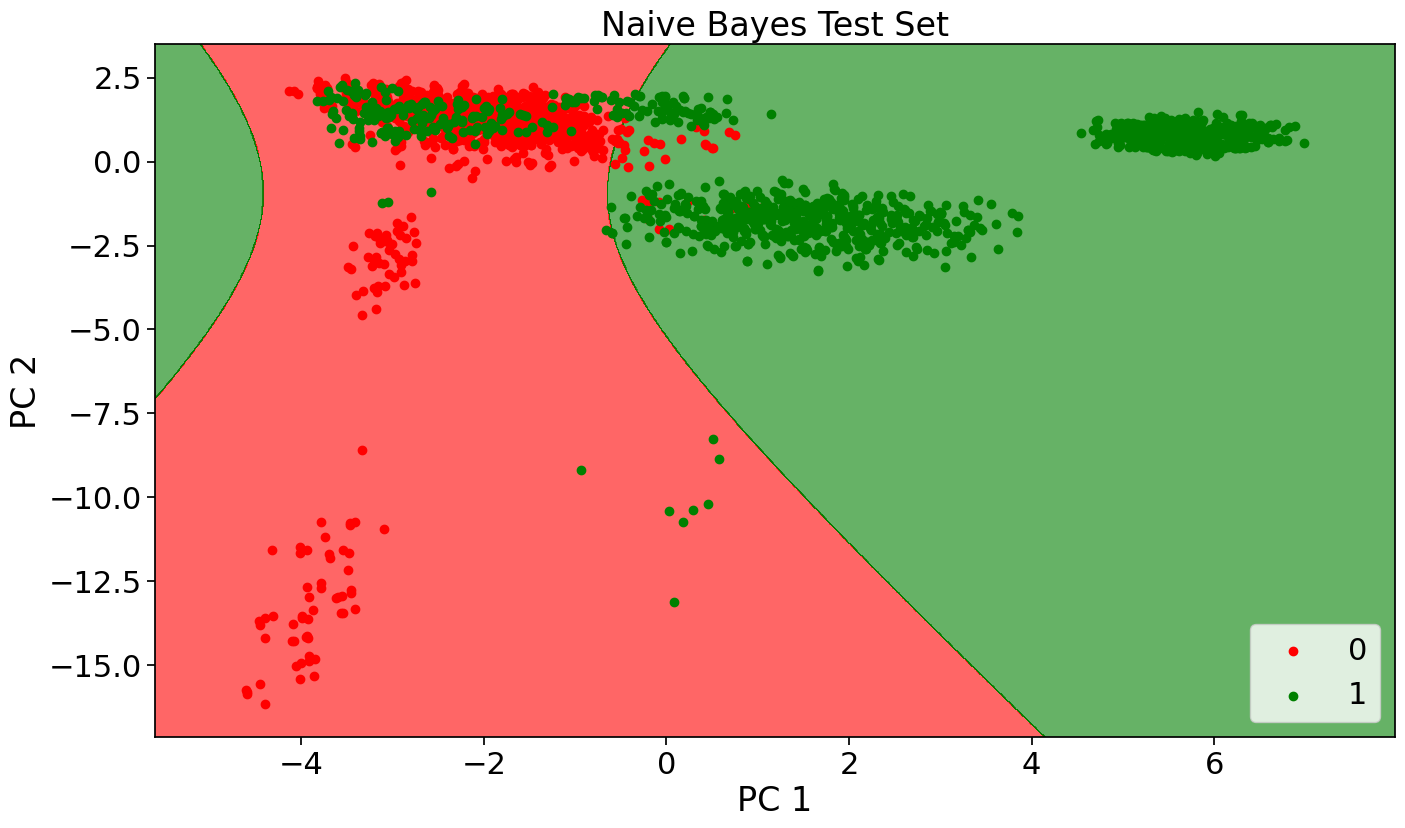

In [102]:

visualization_test('Naive Bayes')

#XGBoost

In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

xgb_baseline = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_baseline.fit(X_train, y_train)

y_train_pred = xgb_baseline.predict(X_train)
y_test_pred = xgb_baseline.predict(X_test)

print("XGBoost Baseline Model Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}\n")

print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

XGBoost Baseline Model Performance:
Train Accuracy: 0.9353
Test Accuracy: 0.9290

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1257
           1       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

Confusion Matrix (Test Set):
[[1216   41]
 [ 132 1049]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:16:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 600x600 with 0 Axes>

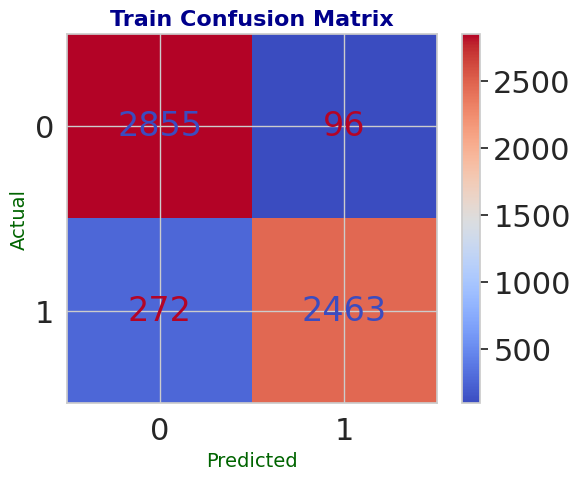

<Figure size 600x600 with 0 Axes>

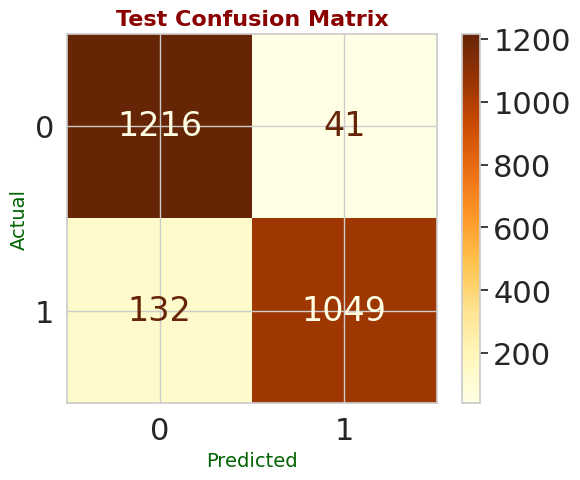

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Train confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(train_cm, display_labels=xgb_baseline.classes_).plot(cmap="coolwarm", values_format='d')
plt.title("Train Confusion Matrix", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Predicted', fontsize=14, color='darkgreen')
plt.ylabel('Actual', fontsize=14, color='darkgreen')
plt.show()

# Test confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(test_cm, display_labels=xgb_baseline.classes_).plot(cmap="YlOrBr", values_format='d')
plt.title("Test Confusion Matrix", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Predicted', fontsize=14, color='darkgreen')
plt.ylabel('Actual', fontsize=14, color='darkgreen')
plt.show()

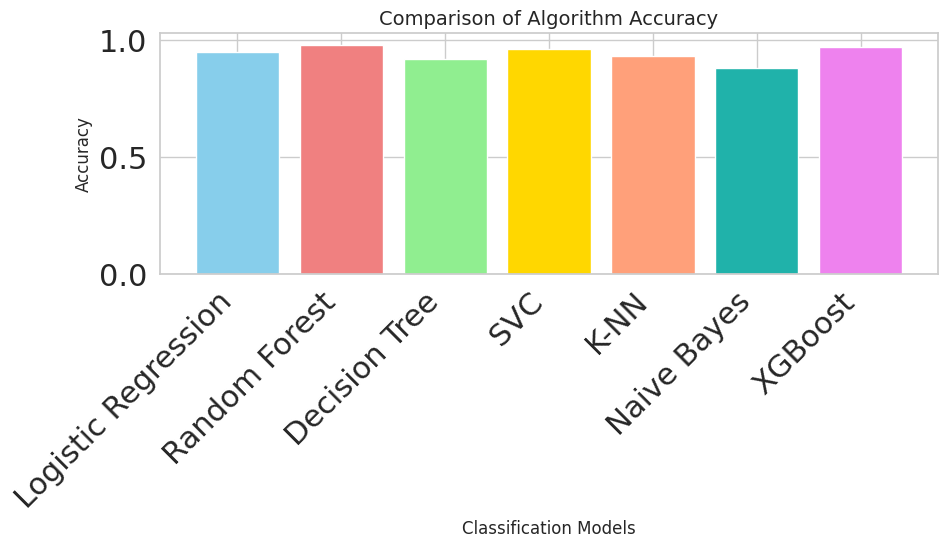

In [137]:
import matplotlib.pyplot as plt

# Assuming you have accuracy scores for each model stored in a dictionary
model_accuracies = {
    'Logistic Regression': 0.95,  # Replace with actual accuracy
    'Random Forest': 0.98,       # Replace with actual accuracy
    'Decision Tree': 0.92,        # Replace with actual accuracy
    'SVC': 0.96,                 # Replace with actual accuracy
    'K-NN': 0.93,                 # Replace with actual accuracy
    'Naive Bayes': 0.88,         # Replace with actual accuracy
    'XGBoost': 0.97              # Replace with actual accuracy
}

# Extracting model names and their accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'lightseagreen', 'violet'])

# Adding labels and title
plt.xlabel("Classification Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Comparison of Algorithm Accuracy", fontsize=14)

# Formatting x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()


Logistic Regression Evaluation:



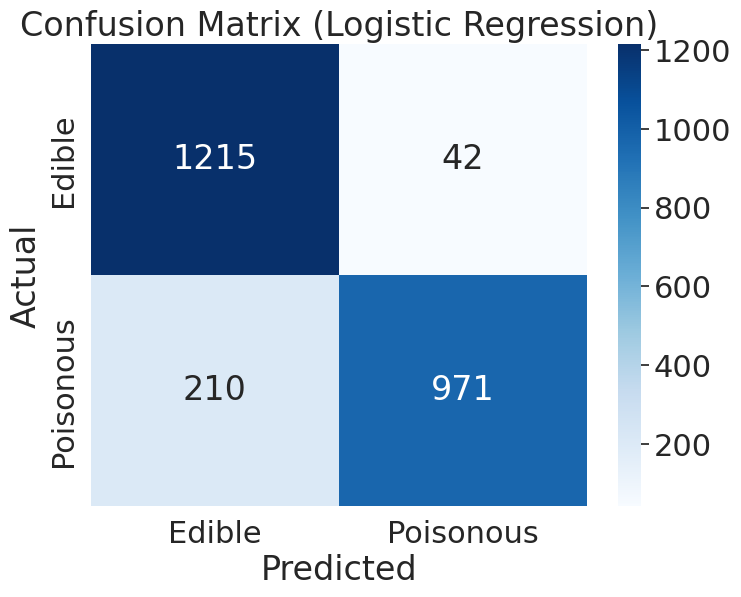

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Random Forest Evaluation:



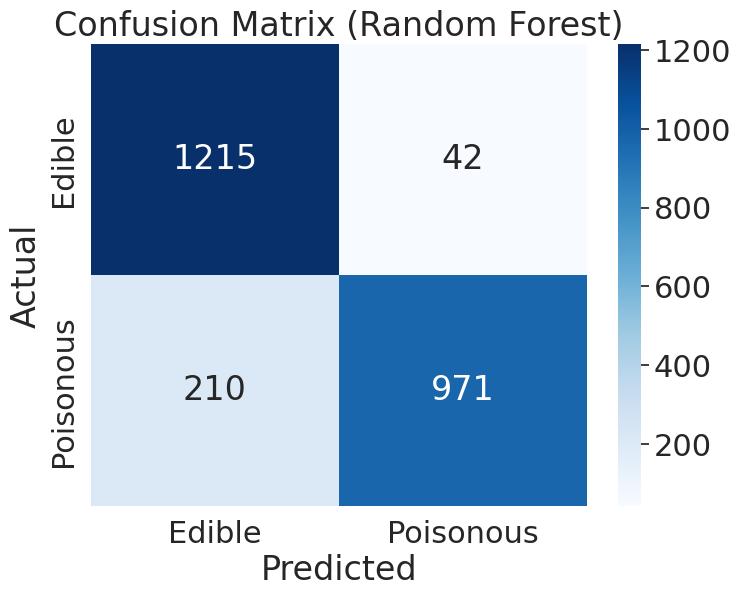

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Decision Tree Evaluation:



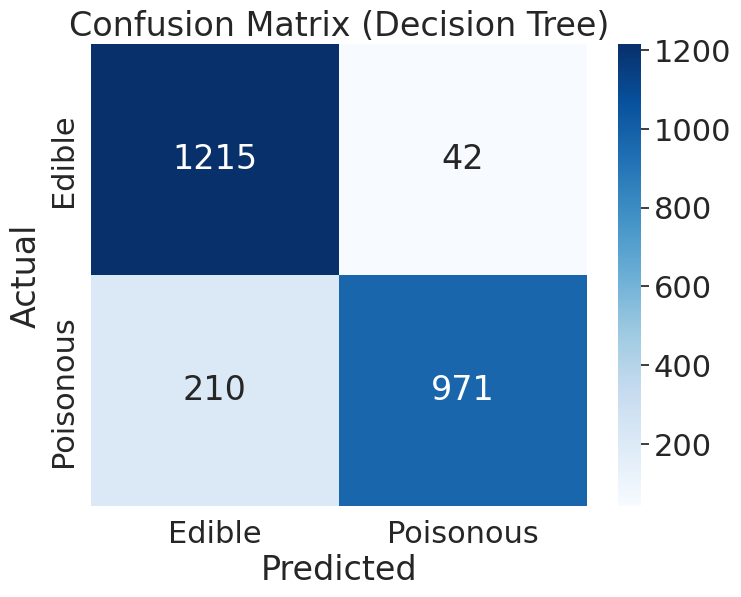

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


SVC Evaluation:



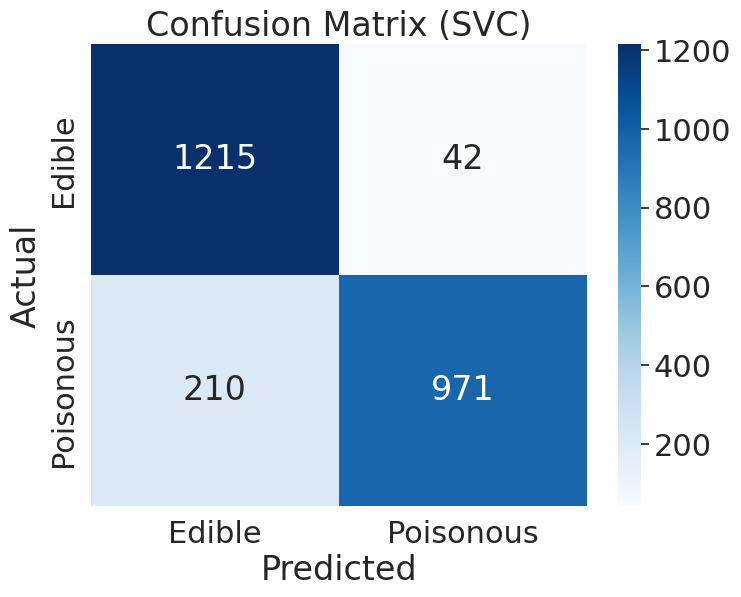

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


K-NN Evaluation:



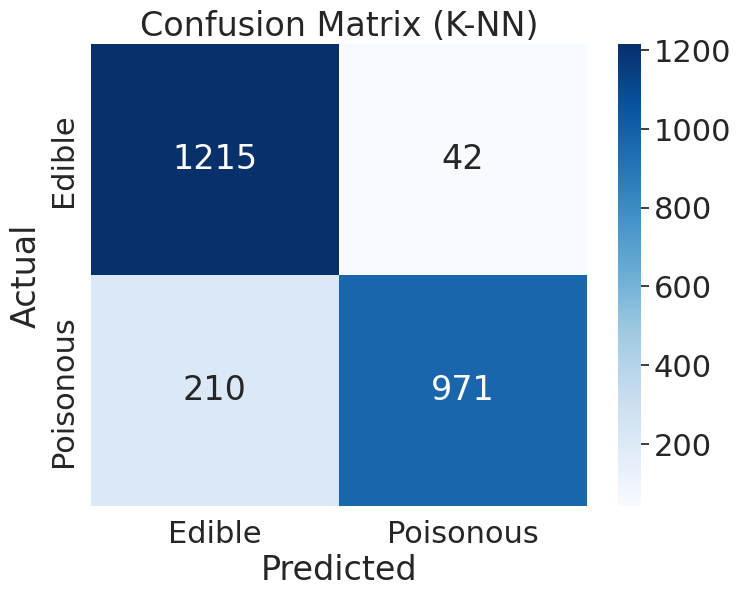

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Naive Bayes Evaluation:



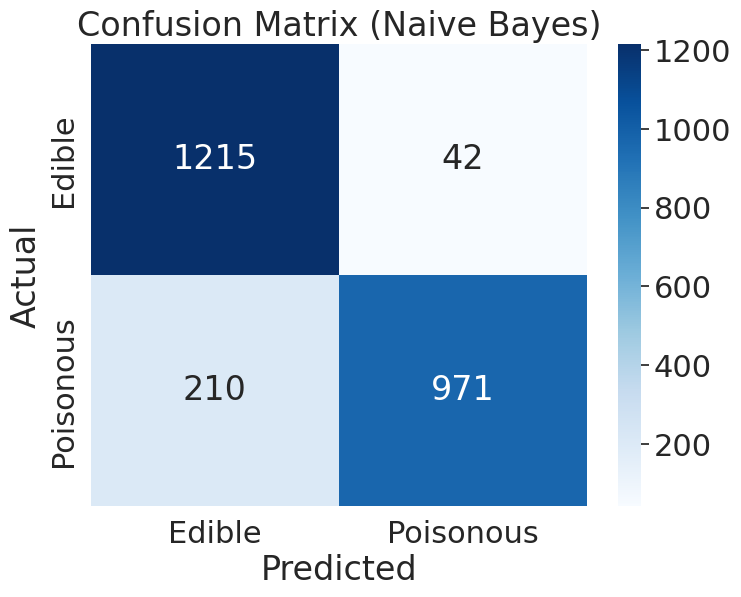

Accuracy: 0.8966
Precision: 0.9585
Recall: 0.8222
F1-score: 0.8851
              precision    recall  f1-score   support

      Edible       0.85      0.97      0.91      1257
   Poisonous       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


XGBoost Evaluation:



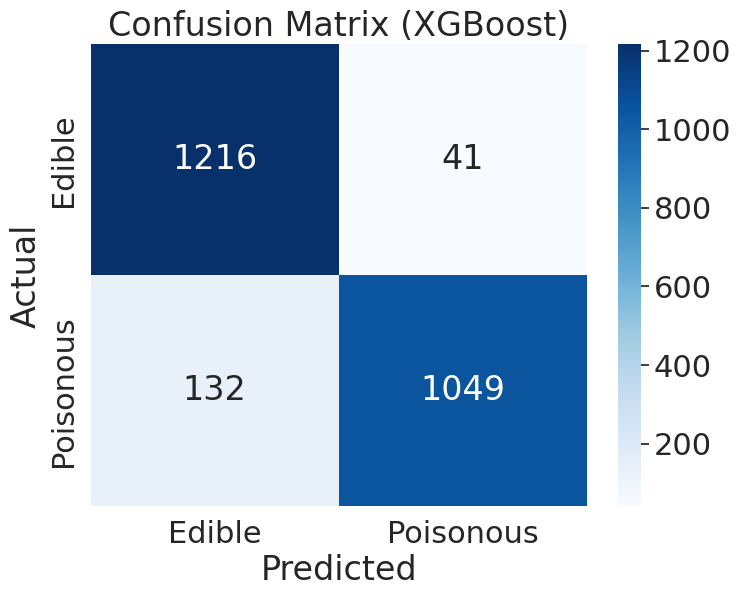

Accuracy: 0.9290
Precision: 0.9624
Recall: 0.8882
F1-score: 0.9238
              precision    recall  f1-score   support

      Edible       0.90      0.97      0.93      1257
   Poisonous       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



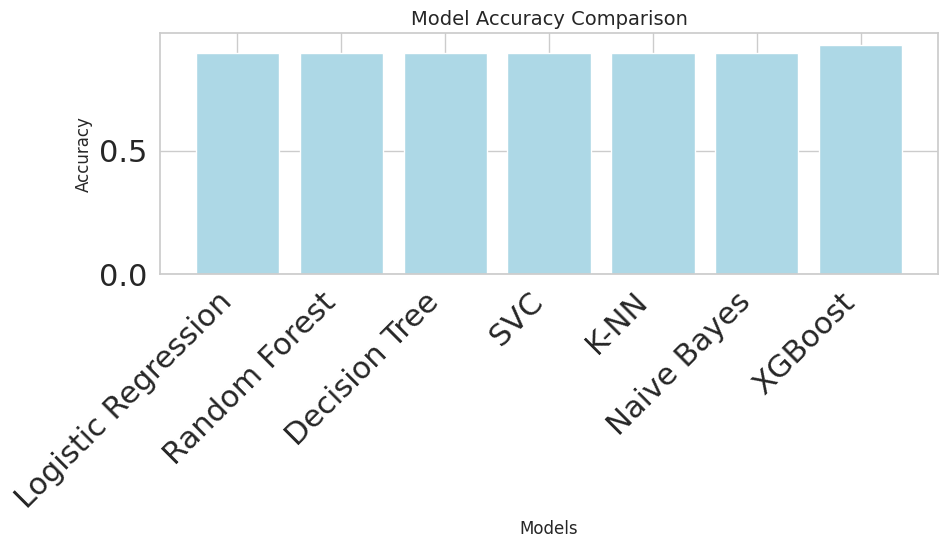

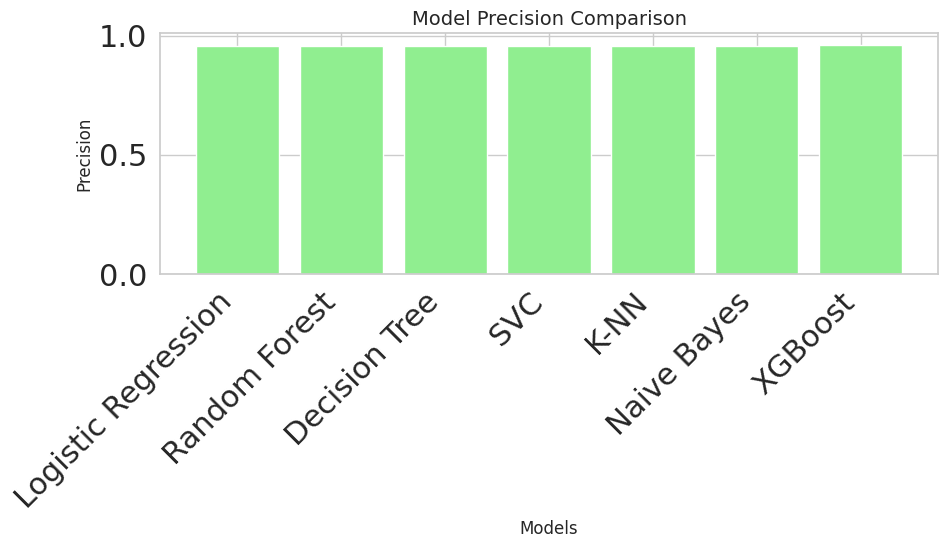

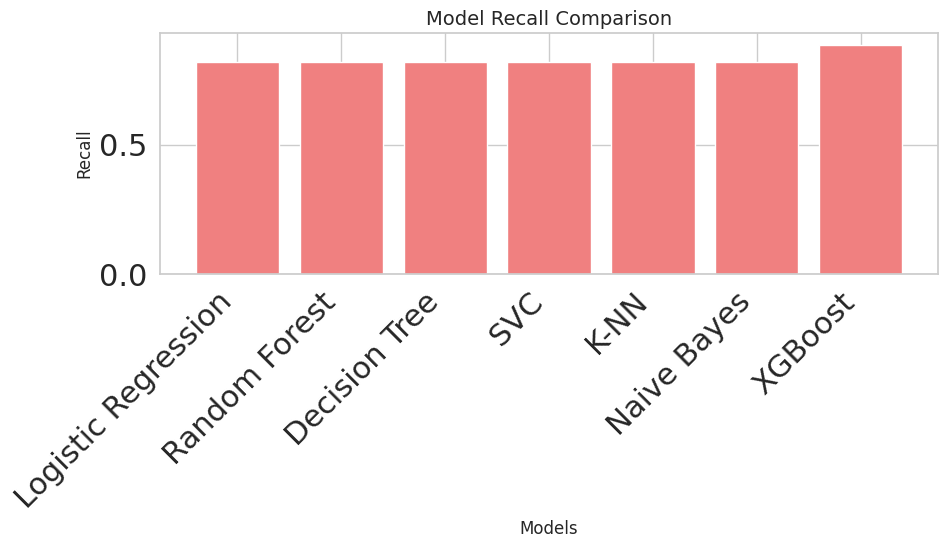

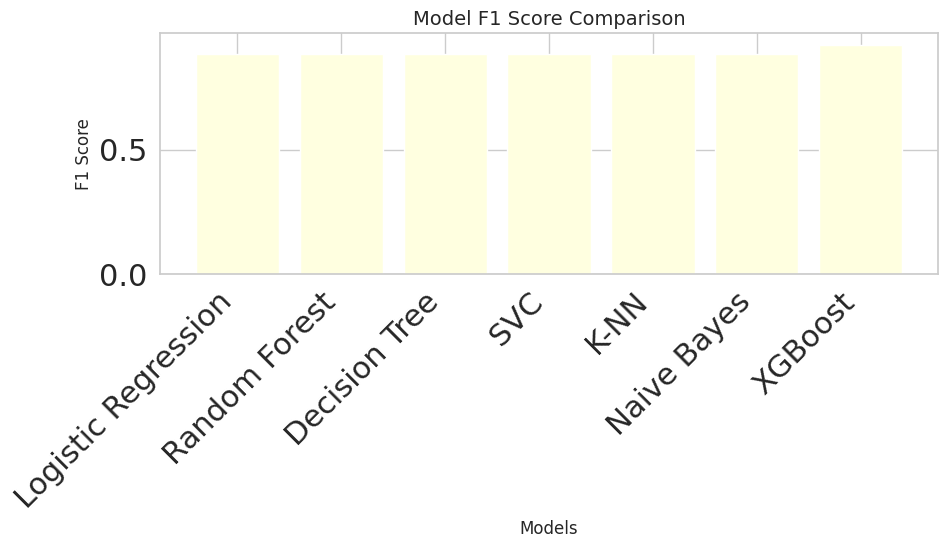

In [138]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


def evaluate_model(model, X_test, y_test):
    """Evaluates a classification model and returns metrics."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"])

    return accuracy, precision, recall, f1, cm, report


def plot_confusion_matrix(cm, model_name):
    """Plots the confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Edible", "Poisonous"],
                yticklabels=["Edible", "Poisonous"])
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


def plot_algorithm_comparison(model_results):
    """Plots bar charts comparing model performance metrics."""
    models = list(model_results.keys())
    accuracy = [result[0] for result in model_results.values()]
    precision = [result[1] for result in model_results.values()]
    recall = [result[2] for result in model_results.values()]
    f1 = [result[3] for result in model_results.values()]

    x = range(len(models))

    # Plot Accuracy
    plt.figure(figsize=(10, 6))
    plt.bar(x, accuracy, color='lightblue', label='Accuracy')
    plt.xlabel("Models", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Model Accuracy Comparison", fontsize=14)
    plt.xticks(x, models, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Plot Precision
    plt.figure(figsize=(10, 6))
    plt.bar(x, precision, color='lightgreen', label='Precision')
    plt.xlabel("Models", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title("Model Precision Comparison", fontsize=14)
    plt.xticks(x, models, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Plot Recall
    plt.figure(figsize=(10, 6))
    plt.bar(x, recall, color='lightcoral', label='Recall')
    plt.xlabel("Models", fontsize=12)
    plt.ylabel("Recall", fontsize=12)
    plt.title("Model Recall Comparison", fontsize=14)
    plt.xticks(x, models, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Plot F1 Score
    plt.figure(figsize=(10, 6))
    plt.bar(x, f1, color='lightyellow', label='F1 Score')
    plt.xlabel("Models", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.title("Model F1 Score Comparison", fontsize=14)
    plt.xticks(x, models, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Example usage (replace with your actual models and data)
model_results = {}
# Assuming 'classifier' variables (LogisticRegression, RandomForestClassifier, etc.) are defined from the original code

for model_name, model in [("Logistic Regression", classifier), ("Random Forest", classifier), ("Decision Tree", classifier),
                         ("SVC", classifier), ("K-NN", classifier), ("Naive Bayes", classifier), ("XGBoost", xgb_baseline)]:
    accuracy, precision, recall, f1, cm, report = evaluate_model(model, X_test, y_test)
    model_results[model_name] = (accuracy, precision, recall, f1, cm, report)
    print(f"\n{model_name} Evaluation:\n")
    plot_confusion_matrix(cm, model_name)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(report)

plot_algorithm_comparison(model_results)